# Data Wrangling and Exploratory Data Analysis

In [1045]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline

from library.sb_utils import save_file

In [1046]:
# Load data
train = pd.read_csv('/Users/ramijauregui/Desktop/Data_Analysis_Projects/Springboard/House_Price_Prediction/raw_data/train.csv')
test = pd.read_csv('/Users/ramijauregui/Desktop/Data_Analysis_Projects/Springboard/House_Price_Prediction/raw_data/test.csv')


## Train Data

In [1047]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1048]:
train.shape

(1259, 81)

In [1049]:
train = train.set_index('Id')

In [1050]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1259.000000  1041.000000    1259.000000  1259.000000  1259.000000   
mean     56.914218    70.110471   10524.300238     6.103257     5.570294   
std      42.353617    23.522213   10391.598333     1.381394     1.119465   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7590.000000     5.000000     5.000000   
50%      50.000000    70.000000    9452.000000     6.000000     5.000000   
75%      70.000000    80.000000   11611.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1259.000000   1259.000000  1252.000000  1259.000000  1259.000000  ...   
mean   1971.478157   1984.816521   103.133387   443.334392    45.725973  ...   
std      29.933659     20.617506   182.185126   439.025793   159.593598  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.500000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1993.000000     0.000000   385.000000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.000000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  2260.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1259.000000  1259.000000    1259.000000  1259.000000  1259.000000   
mean     94.604448    46.150913      21.625099     3.482129    14.668785   
std     123.939261    65.449317      60.920712    29.289552    54.093490   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   523.000000     552.000000   508.000000   410.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1259.000000   1259.000000  1259.000000  1259.000000    1259.000000  
mean      1.819698     45.944400     6.315330  2007.799841  181144.812550  
std      32.364185    525.688744     2.684202     1.324095   80588.024473  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129900.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163500.000000  
75%       0.000000      0.000000     8.000000  2009.000000  213750.000000  
max     648.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [1051]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1 to 1259
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1259 non-null   int64  
 1   MSZoning       1259 non-null   object 
 2   LotFrontage    1041 non-null   float64
 3   LotArea        1259 non-null   int64  
 4   Street         1259 non-null   object 
 5   Alley          76 non-null     object 
 6   LotShape       1259 non-null   object 
 7   LandContour    1259 non-null   object 
 8   Utilities      1259 non-null   object 
 9   LotConfig      1259 non-null   object 
 10  LandSlope      1259 non-null   object 
 11  Neighborhood   1259 non-null   object 
 12  Condition1     1259 non-null   object 
 13  Condition2     1259 non-null   object 
 14  BldgType       1259 non-null   object 
 15  HouseStyle     1259 non-null   object 
 16  OverallQual    1259 non-null   int64  
 17  OverallCond    1259 non-null   int64  
 18  YearBuil

In [1052]:
missing = pd.concat([train.isnull().sum(), 100 * train.isnull().mean()], axis=1,)
missing.columns=['count', '%']
missing = missing.sort_values(by='count', ascending=False)
missing.head(20)

count          %
PoolQC         1255  99.682288
MiscFeature    1208  95.949166
Alley          1183  93.963463
Fence          1019  80.937252
FireplaceQu     599  47.577442
LotFrontage     218  17.315330
GarageCond       71   5.639396
GarageQual       71   5.639396
GarageType       71   5.639396
GarageFinish     71   5.639396
GarageYrBlt      71   5.639396
BsmtExposure     36   2.859412
BsmtFinType2     36   2.859412
BsmtQual         35   2.779984
BsmtCond         35   2.779984
BsmtFinType1     35   2.779984
MasVnrType        7   0.555997
MasVnrArea        7   0.555997
MSSubClass        0   0.000000
Fireplaces        0   0.000000

#### SalePrice

Property's sale price in dollars

In [1053]:
train['SalePrice'].nunique()

614

In [1054]:
train['SalePrice'].describe()

count      1259.000000
mean     181144.812550
std       80588.024473
min       34900.000000
25%      129900.000000
50%      163500.000000
75%      213750.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1055]:
train['SalePrice'].isna().sum()

0

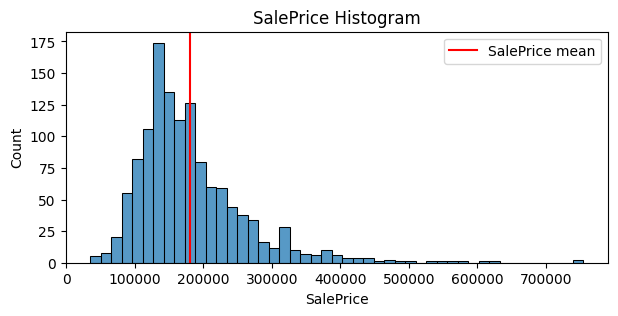

In [1056]:
fig, ax = plt.subplots(figsize=(7, 3))

g = sns.histplot(data=train, x='SalePrice')
g.set(title='SalePrice Histogram')
g.axvline(x=train['SalePrice'].mean(), color='red')
g.legend(['SalePrice mean'])

#plt.savefig('../images/SalePrice_histogram.png', bbox_inches='tight')
plt.show()

In [1057]:
# Determining the Skewness of data 
print ("SalePrice skew is:", train.SalePrice.skew())

SalePrice skew is: 1.9631594151303469


In [1058]:
# create log transformation of SalePrice
#train['Skewed_SP'] = np.log(train['SalePrice']+1)

#fig, ax = plt.subplots(figsize=(7, 3))

#g = sns.histplot(data=train, x='Skewed_SP')
#g.set(title='Skewed_SP Histogram')
#g.axvline(x=train['Skewed_SP'].mean(), color='red')
#g.legend(['Skewed_SP mean'])

#plt.savefig('../images/SalePrice_histogram.png', bbox_inches='tight')
#plt.show()

In [1059]:
#print ("Skewed_SP skew is:", train['Skewed_SP'].skew())

#### MSSubClass

Building class

In [1060]:
train['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [1061]:
train['MSSubClass'].value_counts(sort=False)

20     465
30      58
40       3
45      12
50     117
60     262
70      50
75      16
80      50
85      17
90      45
120     75
160     55
180      7
190     27
Name: MSSubClass, dtype: int64

In [1062]:
train['MSSubClass'].isna().sum()

0

In [1063]:
def count_box_plots(column, figsize=(7,7), height_ratios=[1,3], labelrotation=0):
    fig, ax = plt.subplots(2,1, figsize=figsize, gridspec_kw={'height_ratios':[1, 3]})

    g1 = sns.countplot(x=train[column], ax=ax[0])
    g1.set(title='{} Value Counts'.format(column))
    g1.grid(visible=1, axis='y')
    g1.tick_params(axis='x', labelrotation=labelrotation)
    
    g2 = sns.boxplot(x=train[column], y=train['SalePrice'], ax=ax[1])
    g2.set(title='{} Spread'.format(column))
    g2.grid(visible=1, axis='y')
    g2.tick_params(axis='x', labelrotation=labelrotation)
    
    fig.tight_layout()
    #plt.savefig('../images/MSZoning_value_counts.png', bbox_inches='tight')
    plt.show()

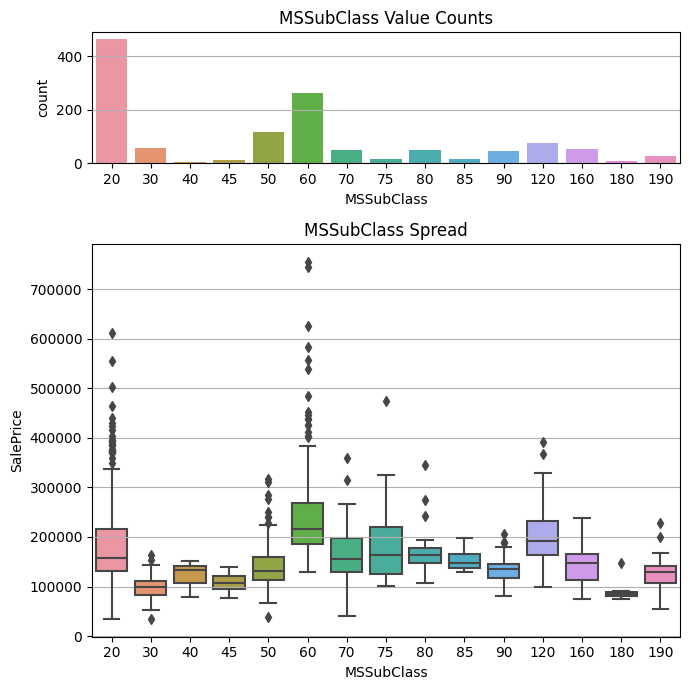

In [1064]:
count_box_plots('MSSubClass')

#### MSZoning

General zoning classification

In [1065]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [1066]:
train['MSZoning'].value_counts()

RL         995
RM         184
FV          57
RH          14
C (all)      9
Name: MSZoning, dtype: int64

In [1067]:
train['MSZoning'].isna().sum()

0

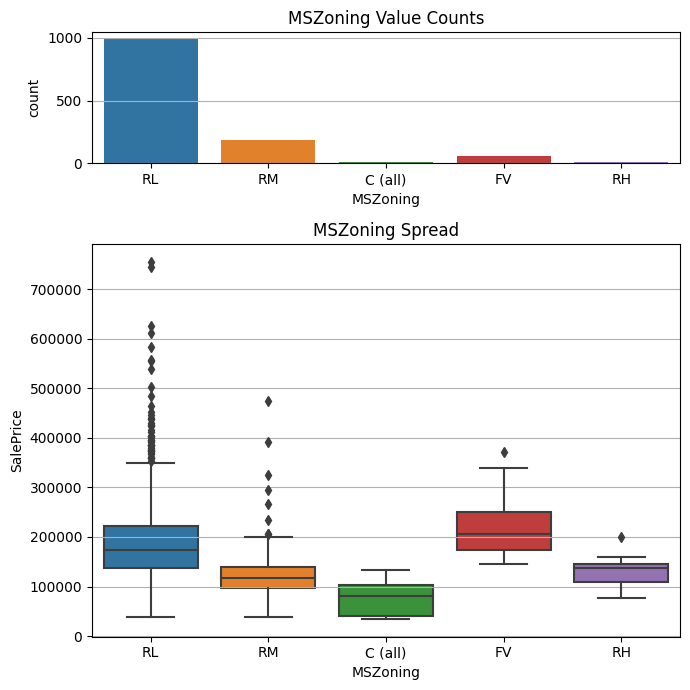

In [1068]:
count_box_plots('MSZoning')

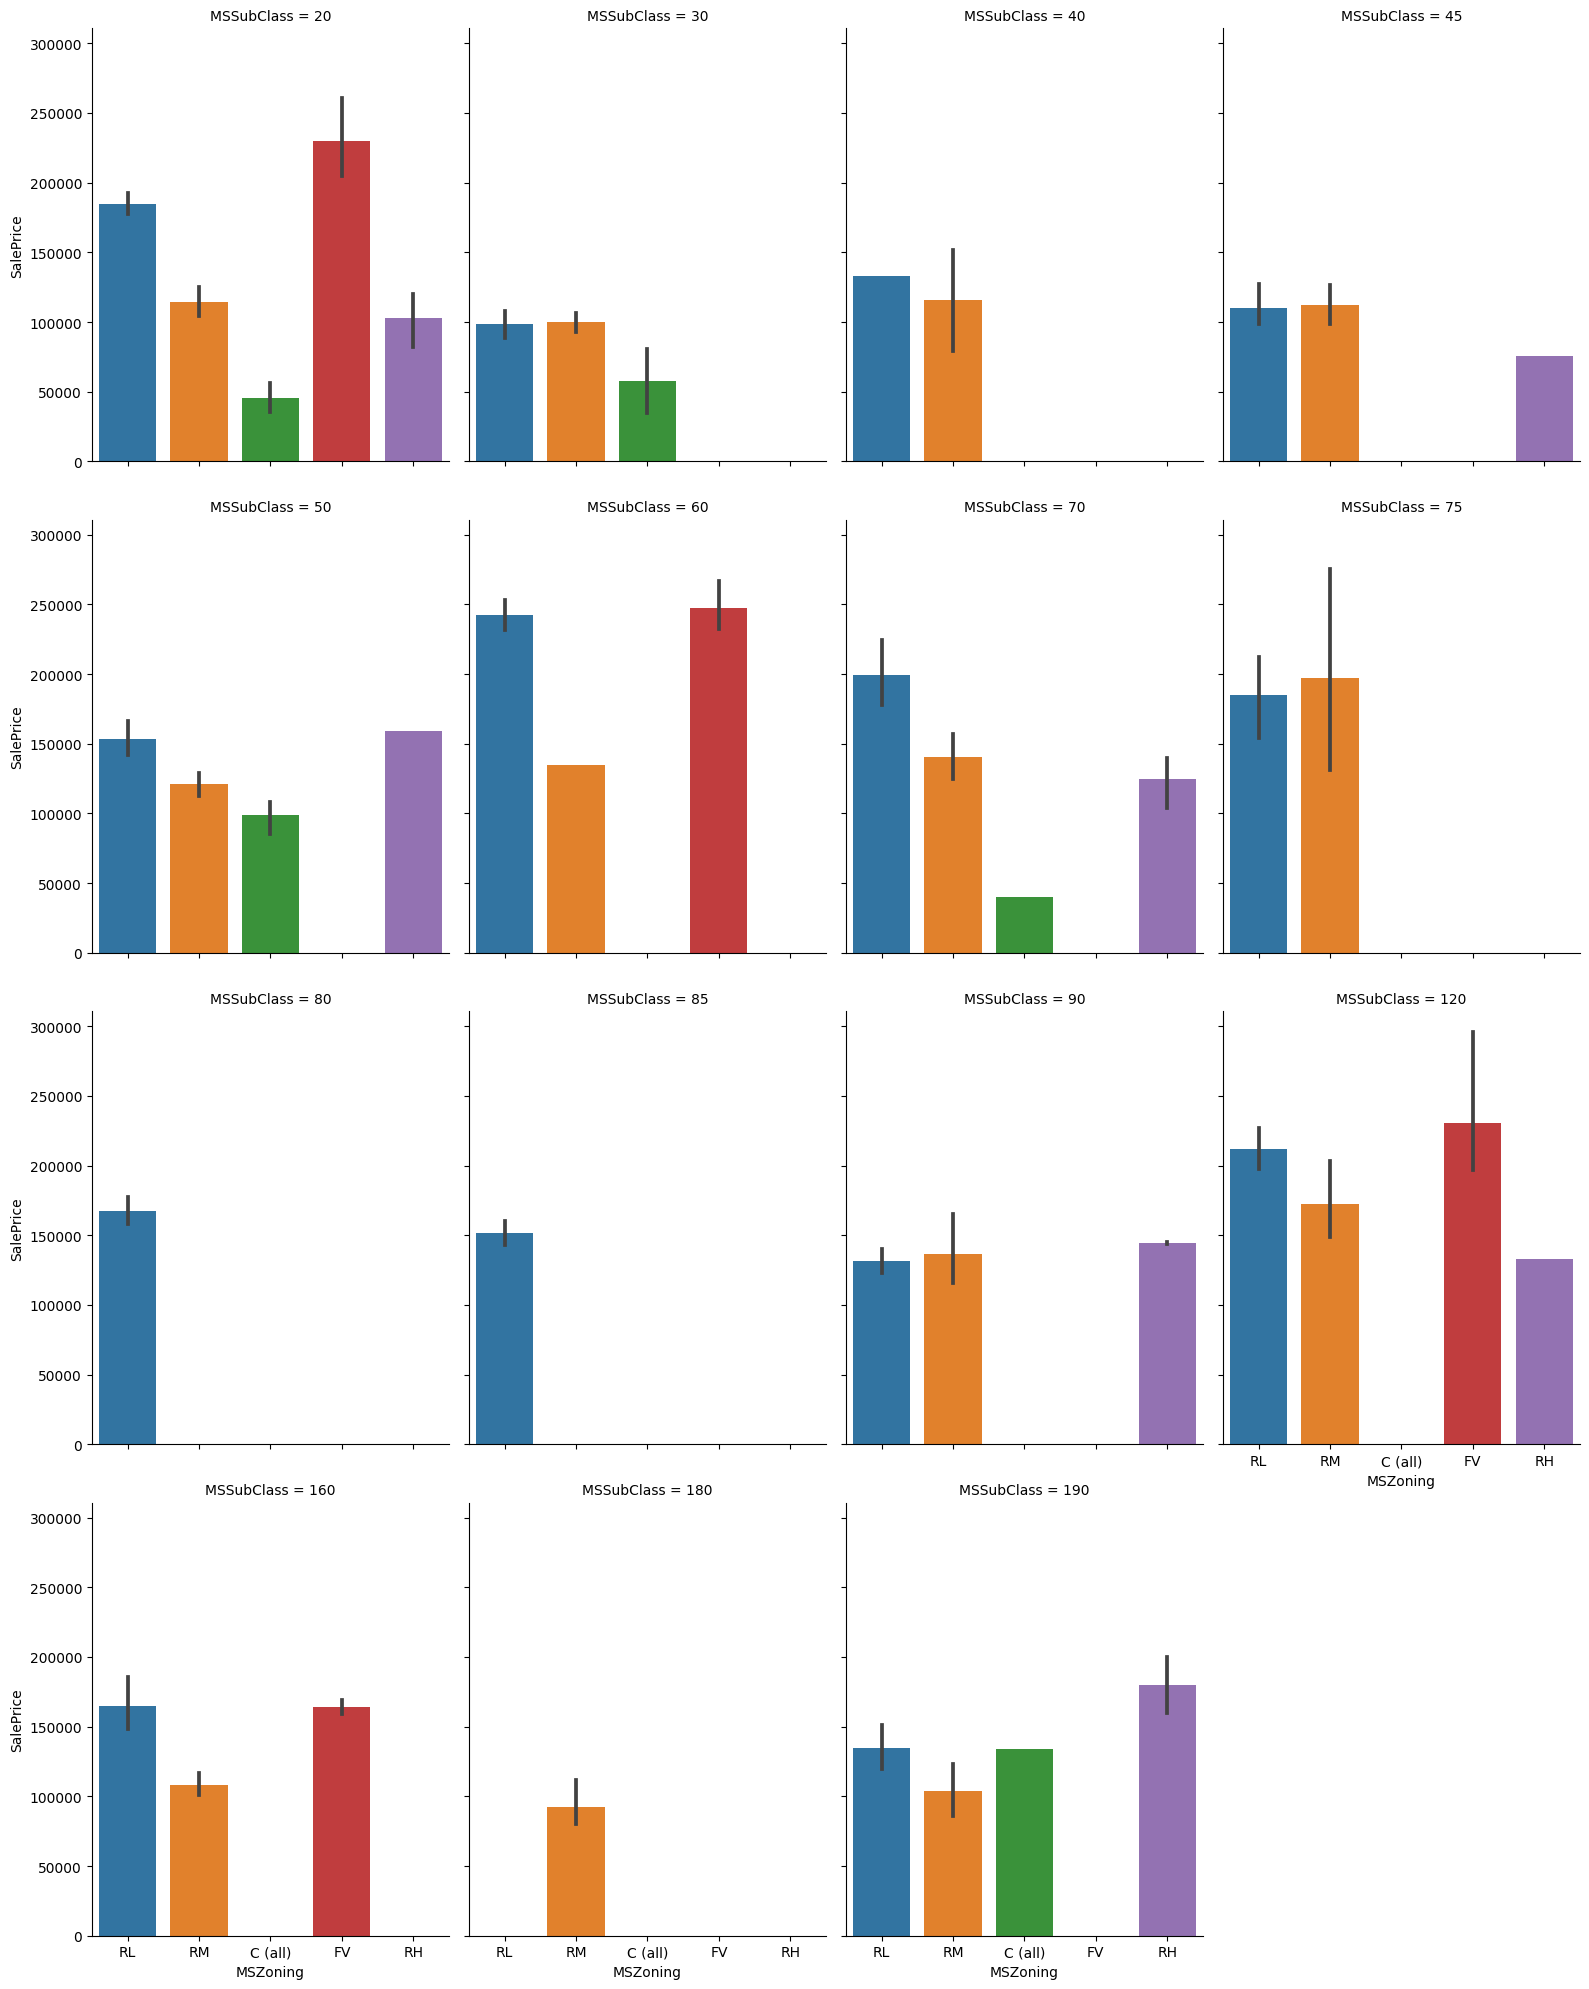

In [1069]:
sns.catplot(x='MSZoning', 
               y='SalePrice', 
               col='MSSubClass', 
               data=train, 
               kind='bar', 
               col_wrap=4, 
               aspect=0.8)
plt.show()

#### LotFrontage

Linear feet of street connected to property

In [1070]:
train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152.])

In [1071]:
train['LotFrontage'].value_counts()

60.0     116
70.0      61
80.0      58
50.0      49
75.0      47
        ... 
138.0      1
144.0      1
39.0       1
38.0       1
137.0      1
Name: LotFrontage, Length: 107, dtype: int64

In [1072]:
train['LotFrontage'].isna().sum()

218

In [1073]:
def hist_scatter_plots(column, figsize=(7,7), height_ratios=[1,3], binwidth=None):
    fig, ax = plt.subplots(2,1, figsize=figsize, gridspec_kw={'height_ratios':[1, 3]})

    g1 = sns.histplot(x=train[column], binwidth=binwidth, ax=ax[0])
    g1.set(title='{} Histogram'.format(column))
    g1.grid(visible=1, axis='y')
    
    g2 = sns.scatterplot(x=train[column], y=train['SalePrice'], ax=ax[1])
    g2.set(title='{} vs SalePrice'.format(column))
#    g2.grid(visible=1, axis='y')
    
    fig.tight_layout()
    #plt.savefig('../images/MSZoning_value_counts.png', bbox_inches='tight')
    plt.show()

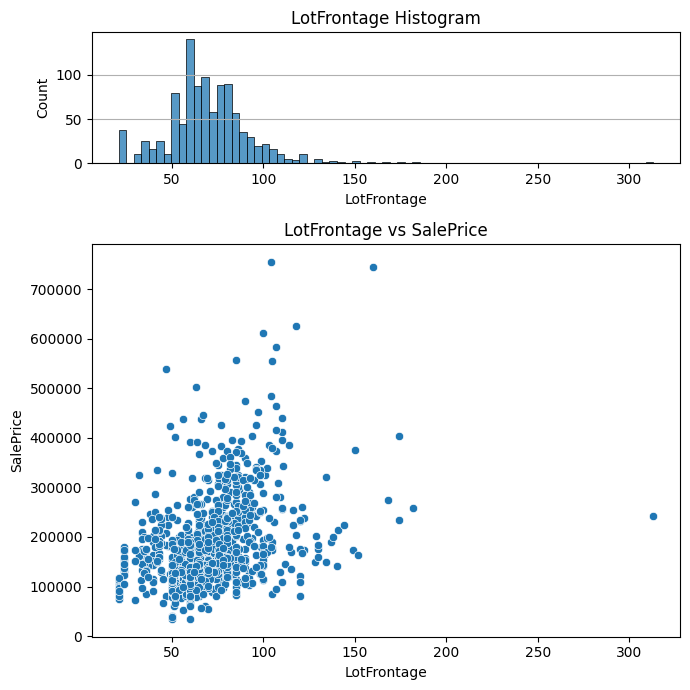

In [1074]:
hist_scatter_plots('LotFrontage')

#### LotArea

Lot size in square feet

In [1075]:
train['LotArea'].nunique()

953

In [1076]:
train['LotArea'].value_counts()

9600     21
7200     20
6000     12
10800    12
9000     12
         ..
9738      1
5271      1
11414     1
12122     1
9230      1
Name: LotArea, Length: 953, dtype: int64

In [1077]:
train['LotArea'].isna().sum()

0

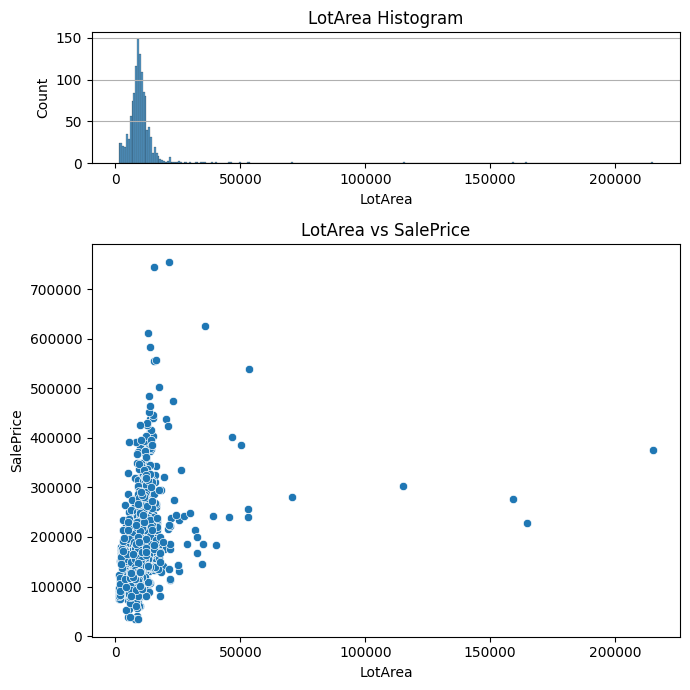

In [1078]:
hist_scatter_plots('LotArea')

#### Street

Type of road access

In [1079]:
train['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [1080]:
train['Street'].value_counts()

Pave    1253
Grvl       6
Name: Street, dtype: int64

In [1081]:
train['Street'].isna().sum()

0

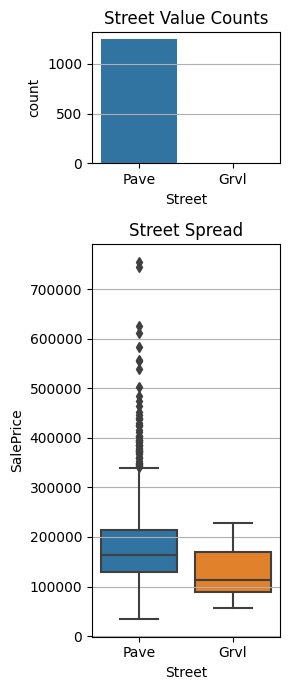

In [1082]:
count_box_plots('Street', figsize=(3,7))

#### Alley

Type of alley access

In [1083]:
train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [1084]:
train['Alley'].value_counts()

Grvl    42
Pave    34
Name: Alley, dtype: int64

In [1085]:
train['Alley'].isna().sum()

1183

In [1086]:
train = train.drop('Alley', axis=1)

#### LotShape

General shape of property

In [1087]:
train['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [1088]:
train['LotShape'].value_counts()

Reg    794
IR1    421
IR2     38
IR3      6
Name: LotShape, dtype: int64

In [1089]:
train['LotShape'].isna().sum()

0

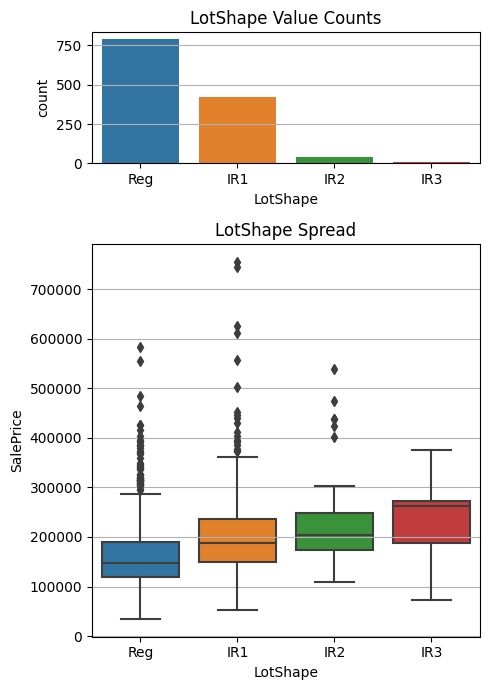

In [1090]:
count_box_plots('LotShape', figsize=(5,7))

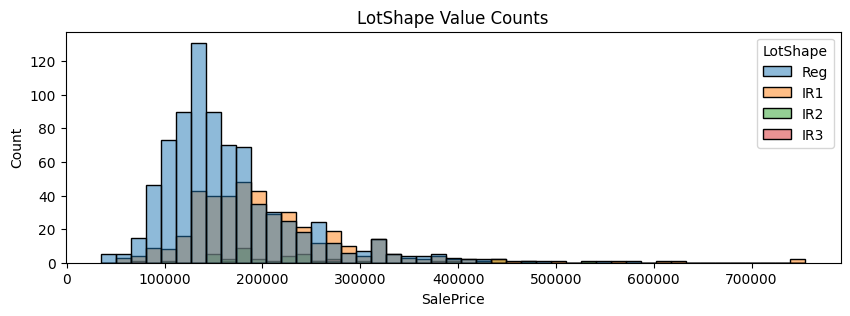

In [1091]:
fig, ax = plt.subplots(figsize=(10, 3))

g = sns.histplot(data=train, hue='LotShape', x='SalePrice')
g.set(title='LotShape Value Counts')

#plt.savefig('../images/Street_value_counts.png', bbox_inches='tight')
plt.show()

#### LandContour

Flatness of the property

In [1092]:
train['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [1093]:
train['LandContour'].value_counts()

Lvl    1134
Bnk      51
HLS      44
Low      30
Name: LandContour, dtype: int64

In [1094]:
train['LandContour'].isna().sum()

0

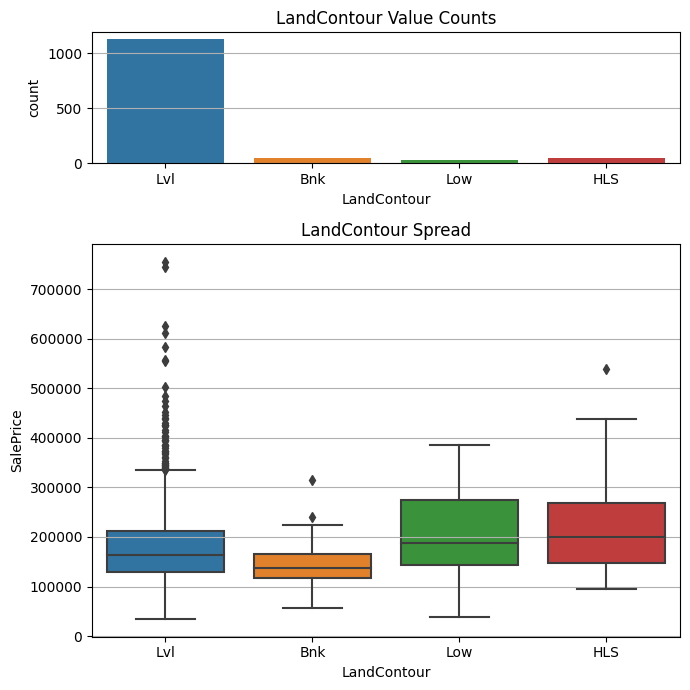

In [1095]:
count_box_plots('LandContour')

#### Utilities

Type of utilities available

In [1096]:
train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [1097]:
train['Utilities'].value_counts()

AllPub    1258
NoSeWa       1
Name: Utilities, dtype: int64

In [1098]:
train['Utilities'].isna().sum()

0

#### LotConfig

Lot Configuration

In [1099]:
train['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [1100]:
train['LotConfig'].value_counts()

Inside     906
Corner     232
CulDSac     79
FR2         40
FR3          2
Name: LotConfig, dtype: int64

In [1101]:
train['LotConfig'].isna().sum()

0

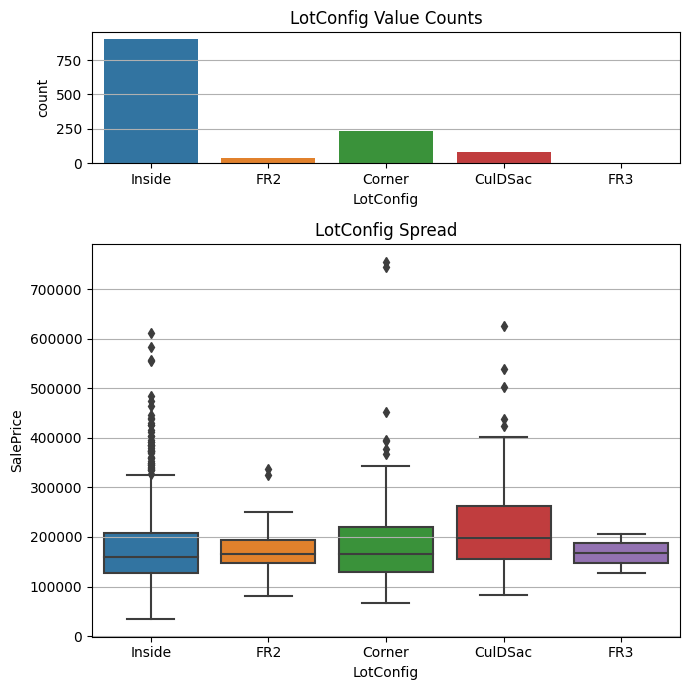

In [1102]:
count_box_plots('LotConfig')

#### LandSlope

Slope of property

In [1103]:
train['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [1104]:
train['LandSlope'].value_counts()

Gtl    1192
Mod      56
Sev      11
Name: LandSlope, dtype: int64

In [1105]:
train['LandSlope'].isna().sum()

0

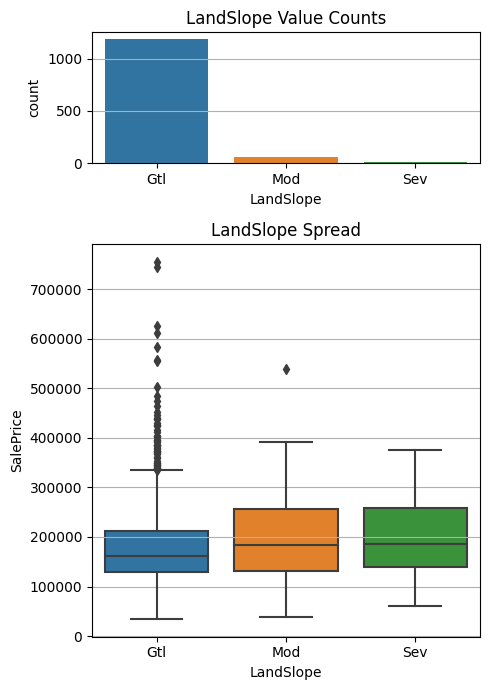

In [1106]:
count_box_plots('LandSlope', figsize=(5,7))

#### Neighborhood

Physical locations within Ames city limits

In [1107]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [1108]:
train['Neighborhood'].value_counts()

NAmes      193
CollgCr    125
OldTown     96
Edwards     84
Somerst     73
NridgHt     72
Sawyer      71
Gilbert     70
NWAmes      58
SawyerW     55
BrkSide     48
Mitchel     43
Crawfor     42
NoRidge     33
IDOTRR      33
Timber      31
ClearCr     25
StoneBr     23
SWISU       21
Blmngtn     15
MeadowV     15
BrDale      13
Veenker     11
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64

In [1109]:
train['Neighborhood'].isna().sum()

0

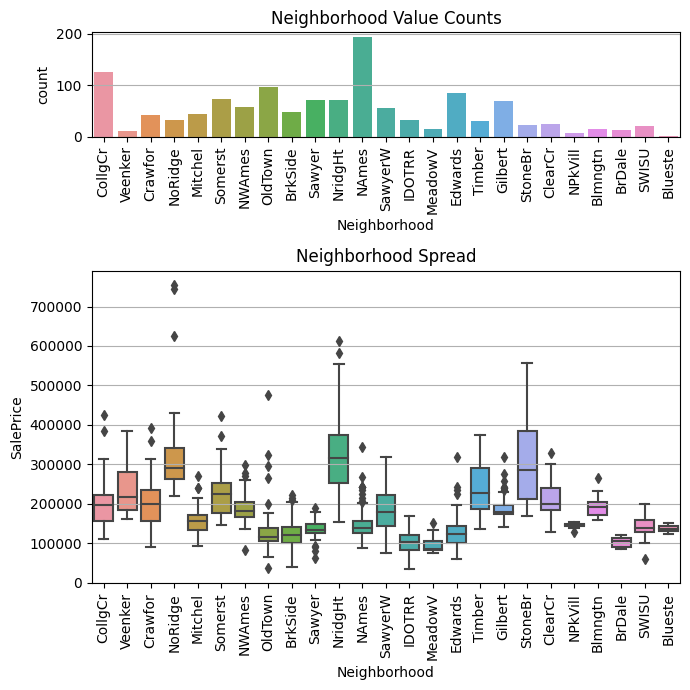

In [1110]:
count_box_plots('Neighborhood', labelrotation=90)

#### Condition1

Proximity to main road or railroad

In [1111]:
train['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [1112]:
train['Condition1'].value_counts()

Norm      1085
Feedr       69
Artery      42
RRAn        22
PosN        17
RRAe        10
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [1113]:
train['Condition1'].isna().sum()

0

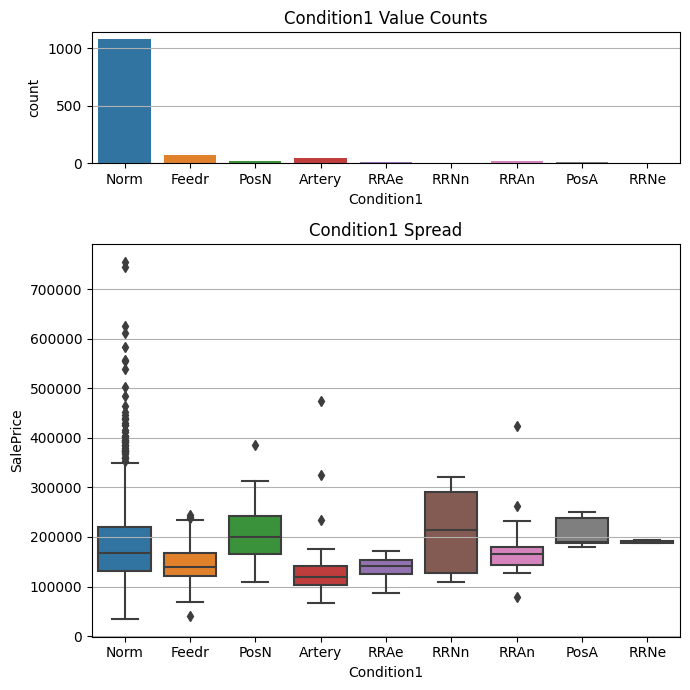

In [1114]:
count_box_plots('Condition1')

#### Condition2

Proximity to main road or railroad (if a second is present)

In [1115]:
train['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [1116]:
train['LandContour'].value_counts()

Lvl    1134
Bnk      51
HLS      44
Low      30
Name: LandContour, dtype: int64

In [1117]:
train['LandContour'].isna().sum()

0

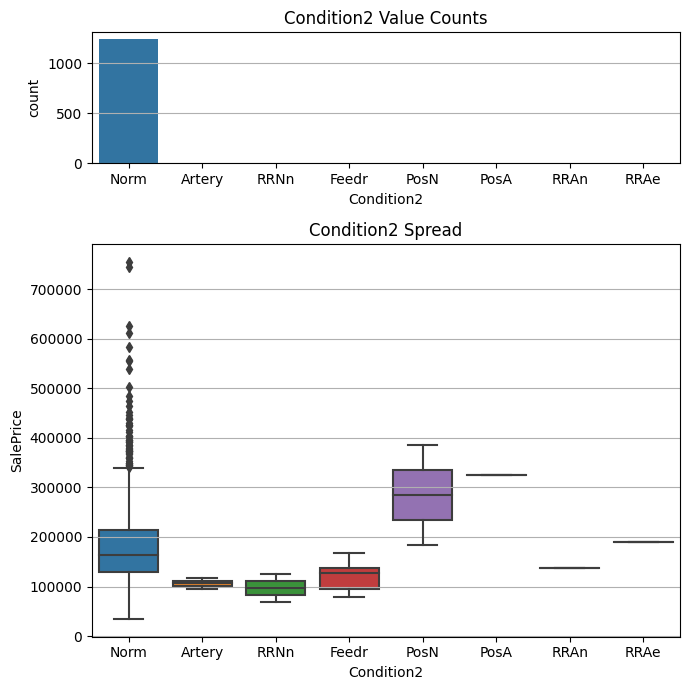

In [1118]:
count_box_plots('Condition2')

#### BldgType

Type of dwelling

In [1119]:
train['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [1120]:
train['BldgType'].value_counts()

1Fam      1052
TwnhsE      95
Duplex      45
Twnhs       39
2fmCon      28
Name: BldgType, dtype: int64

In [1121]:
train['BldgType'].isna().sum()

0

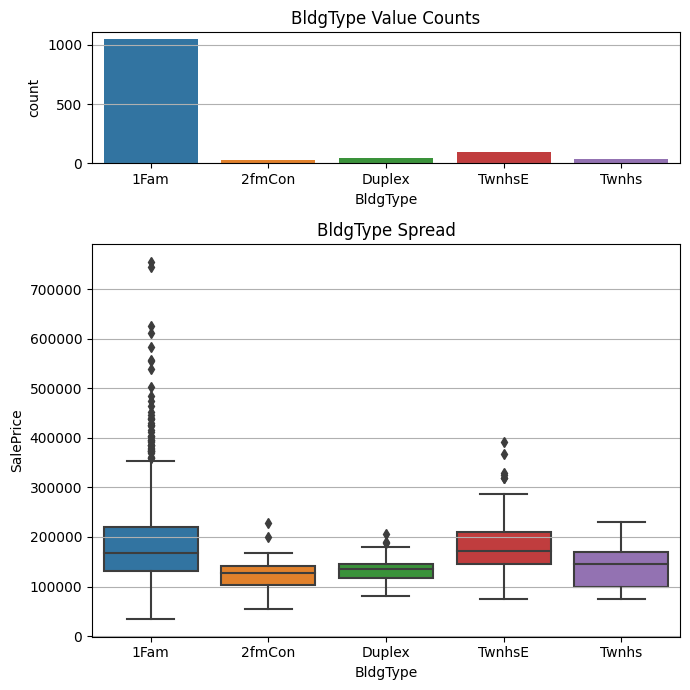

In [1122]:
count_box_plots('BldgType')

#### HouseStyle

Style of dwelling

In [1123]:
train['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [1124]:
train['HouseStyle'].value_counts()

1Story    629
2Story    386
1.5Fin    127
SLvl       55
SFoyer     32
1.5Unf     13
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [1125]:
train['HouseStyle'].isna().sum()

0

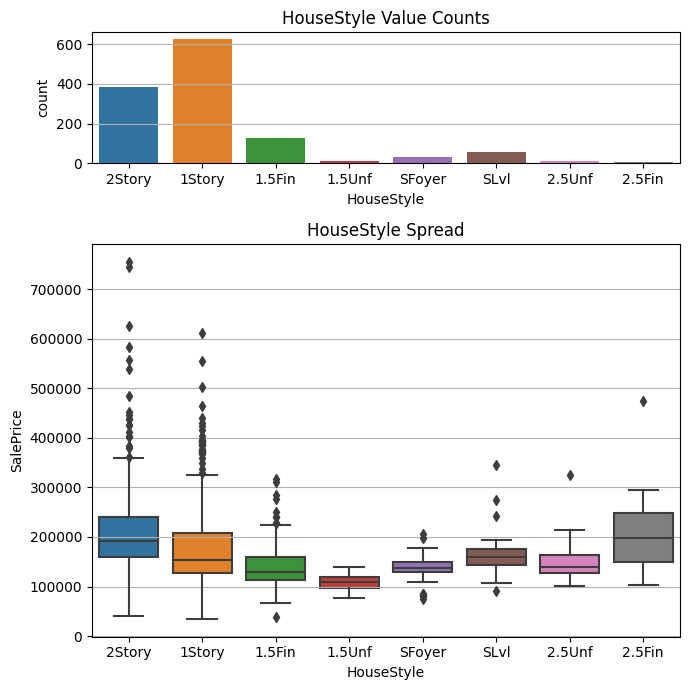

In [1126]:
count_box_plots('HouseStyle')

#### OverallQual

Overall material and finish quality

In [1127]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [1128]:
train['OverallQual'].value_counts()

5     347
6     318
7     279
8     144
4      97
9      38
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

In [1129]:
train['OverallQual'].isna().sum()

0

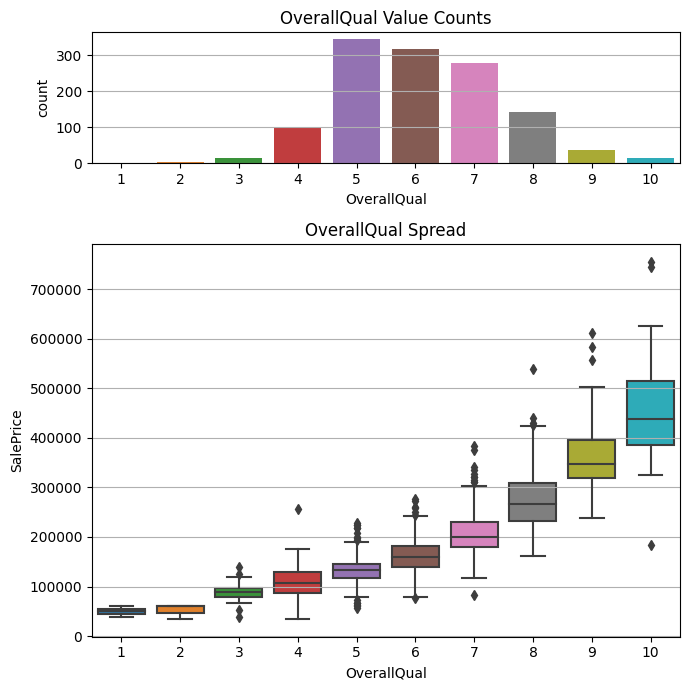

In [1130]:
count_box_plots('OverallQual')

#### OverallCond

Overall condition rating

In [1131]:
train['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1])

In [1132]:
train['OverallCond'].value_counts()

5    710
6    214
7    174
8     67
4     48
3     23
9     17
2      5
1      1
Name: OverallCond, dtype: int64

In [1133]:
train['OverallCond'].isna().sum()

0

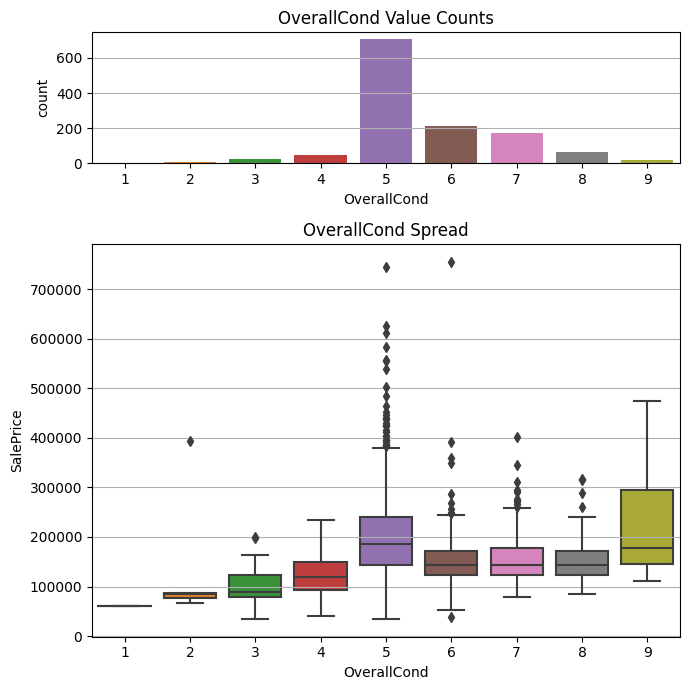

In [1134]:
count_box_plots('OverallCond')

#### YearBuilt

Original construction date

In [1135]:
train['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917])

In [1136]:
train['YearBuilt'].value_counts()

2006    54
2005    53
2004    47
2007    46
2003    41
        ..
1913     1
1917     1
1919     1
1942     1
1875     1
Name: YearBuilt, Length: 110, dtype: int64

In [1137]:
train['YearBuilt'].isna().sum()

0

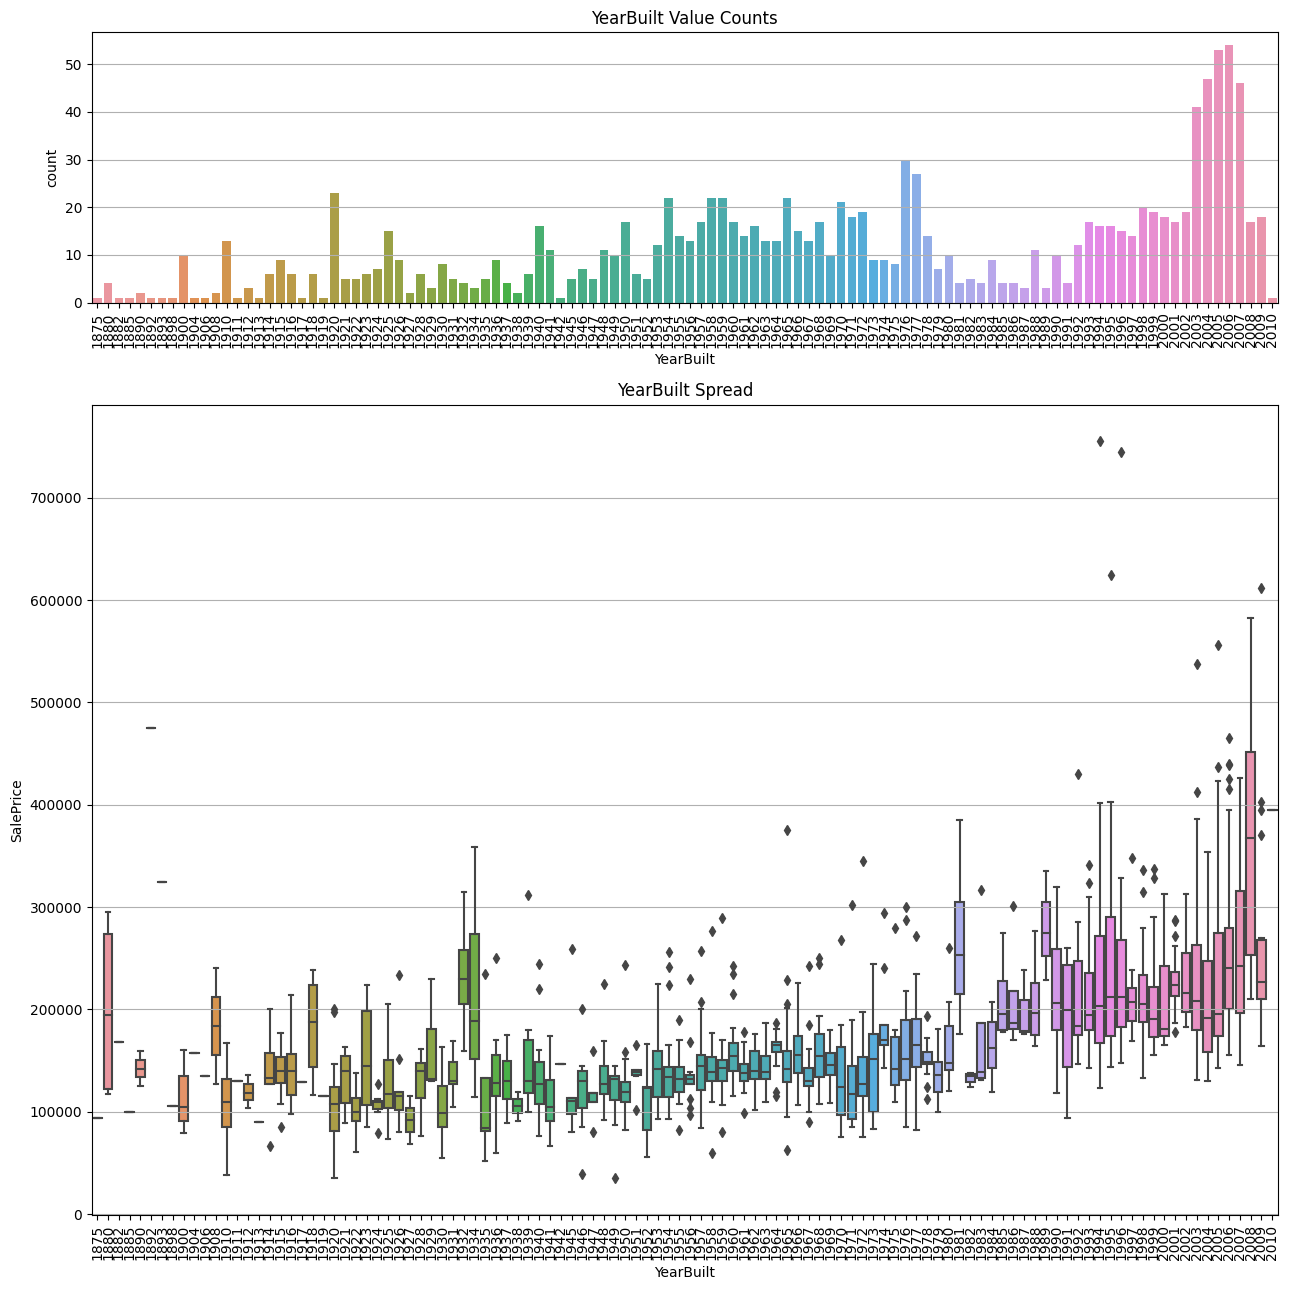

In [1138]:
count_box_plots('YearBuilt', figsize=(13,13), labelrotation=90)

In [1139]:
price_by_year = train.groupby('YearBuilt')['SalePrice'].mean().reset_index()

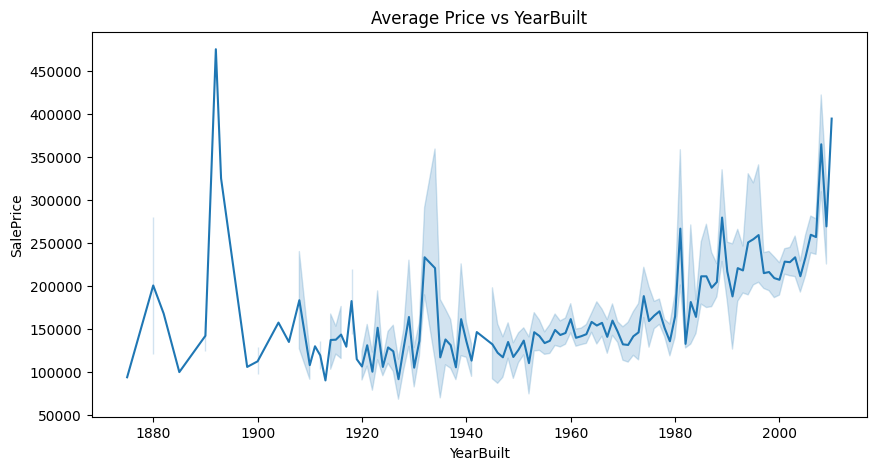

In [1140]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Average Price vs YearBuilt')
sns.lineplot(data=train, x="YearBuilt", y="SalePrice")
plt.show()

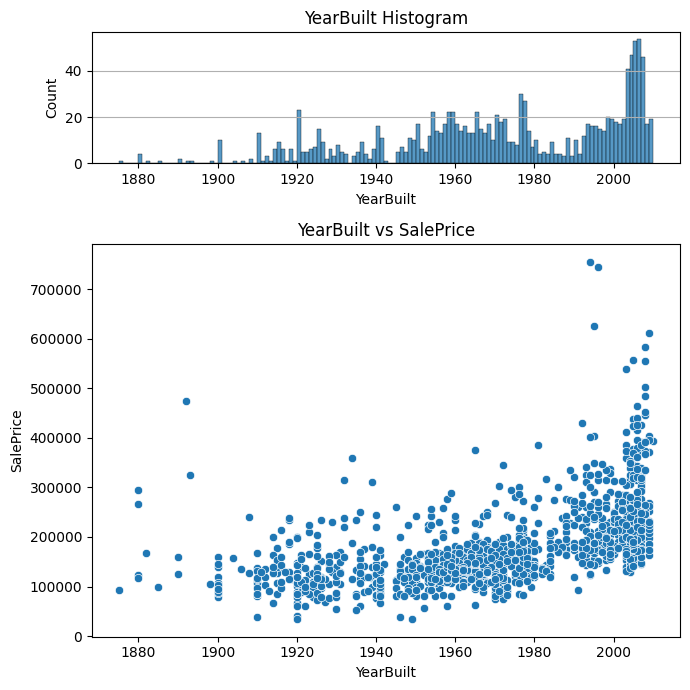

In [1141]:
hist_scatter_plots('YearBuilt', binwidth=1)

#### YearRemodAdd

Remodel date

In [1142]:
train['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

In [1143]:
train['YearRemodAdd'].value_counts()

1950    150
2006     84
2005     61
2007     60
2004     55
       ... 
2010      6
1986      5
1952      5
1983      4
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [1144]:
train['YearRemodAdd'].isna().sum()

0

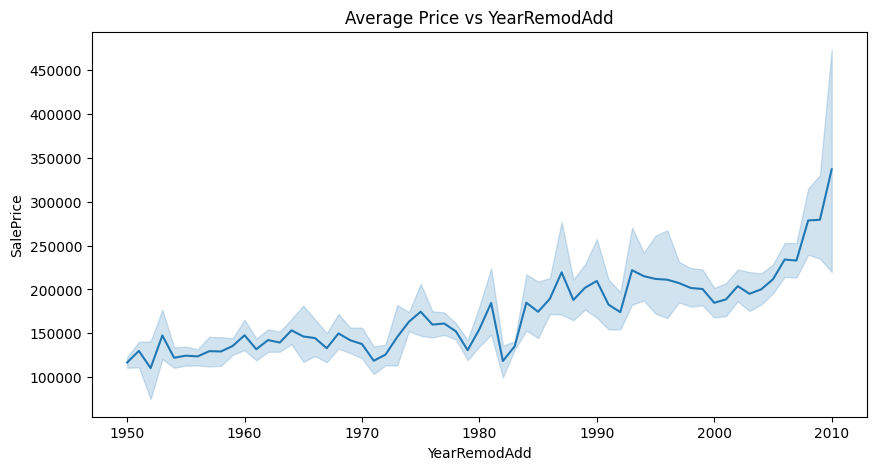

In [1145]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Average Price vs YearRemodAdd')
sns.lineplot(data=train, x="YearRemodAdd", y="SalePrice")
plt.show()

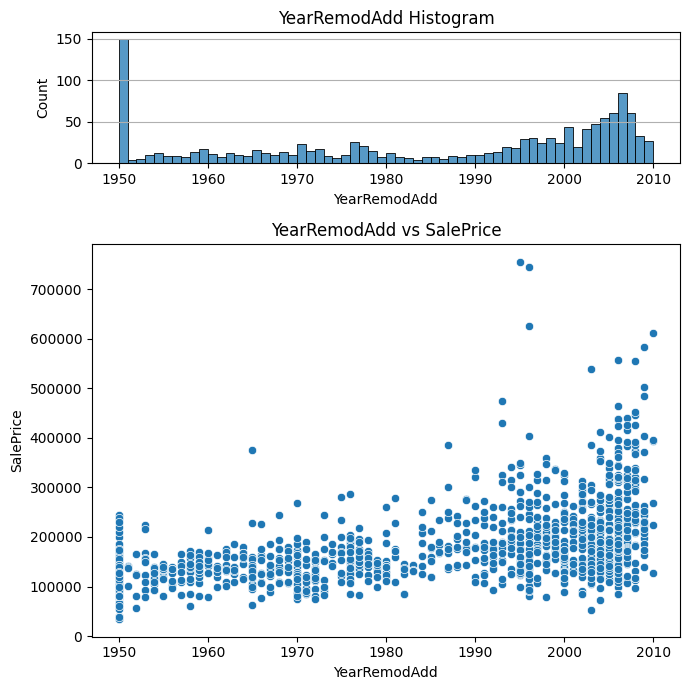

In [1146]:
hist_scatter_plots('YearRemodAdd', binwidth=1)

#### RoofStyle

Type of roof

In [1147]:
train['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [1148]:
train['RoofStyle'].value_counts()

Gable      988
Hip        243
Flat        12
Gambrel      9
Mansard      6
Shed         1
Name: RoofStyle, dtype: int64

In [1149]:
train['RoofStyle'].isna().sum()

0

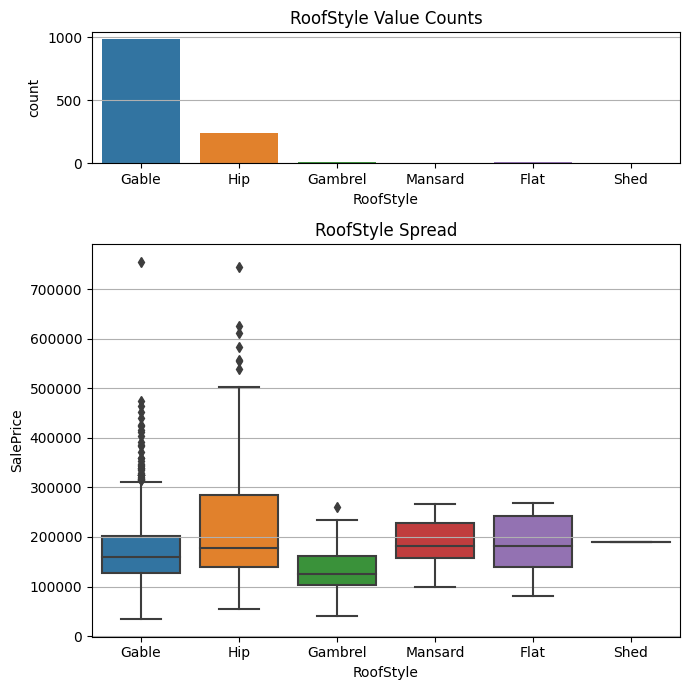

In [1150]:
count_box_plots('RoofStyle')

#### RoofMatl 

Roof material

In [1151]:
train['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv'],
      dtype=object)

In [1152]:
train['RoofMatl'].value_counts()

CompShg    1237
Tar&Grv      10
WdShngl       6
WdShake       4
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

In [1153]:
train['RoofMatl'].isna().sum()

0

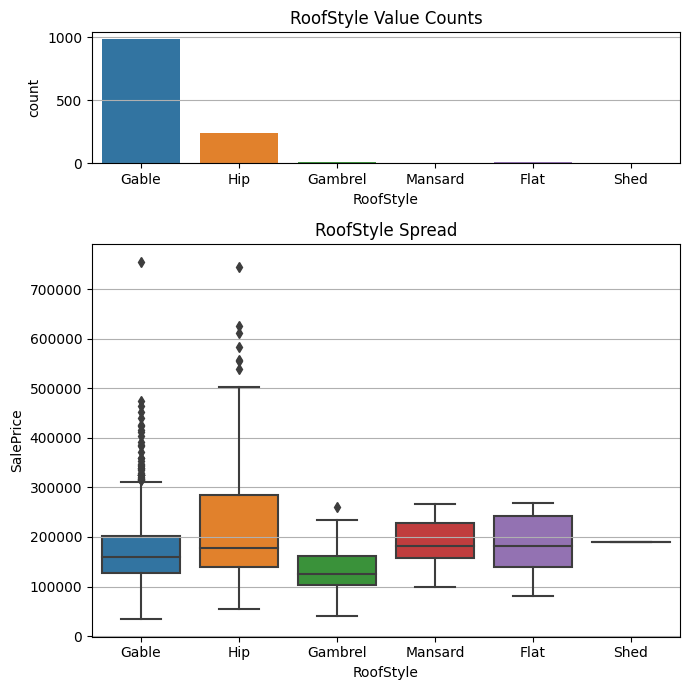

In [1154]:
count_box_plots('RoofStyle')

#### Exterior1st

Exterior covering on house

In [1155]:
train['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc'], dtype=object)

In [1156]:
train['Exterior1st'].value_counts()

VinylSd    440
HdBoard    195
MetalSd    190
Wd Sdng    180
Plywood     96
CemntBd     53
BrkFace     40
WdShing     22
Stucco      20
AsbShng     17
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [1157]:
train['Exterior1st'].isna().sum()

0

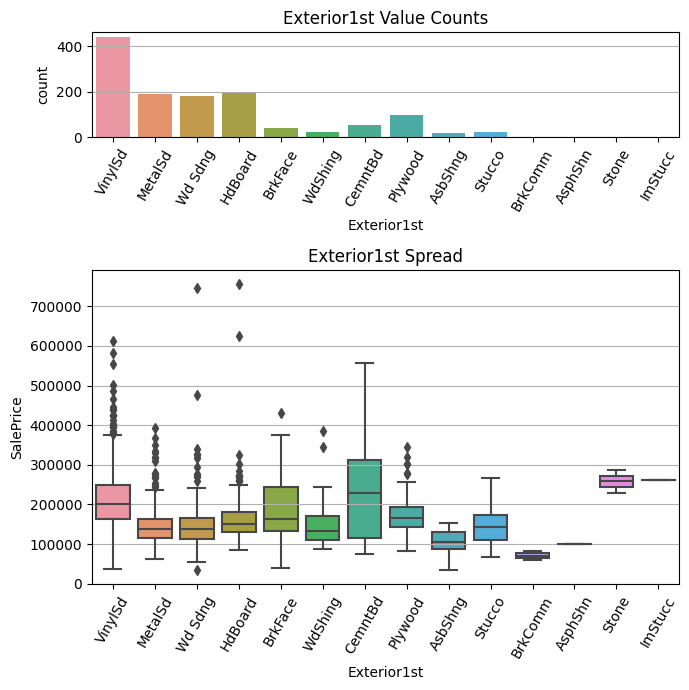

In [1158]:
count_box_plots('Exterior1st', labelrotation=60)

#### Exterior2nd

Exterior covering on house (if more than one material)

In [1159]:
train['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other'], dtype=object)

In [1160]:
train['Exterior2nd'].value_counts()

VinylSd    431
MetalSd    187
HdBoard    180
Wd Sdng    171
Plywood    125
CmentBd     51
Wd Shng     31
Stucco      22
BrkFace     21
AsbShng     16
ImStucc     10
Brk Cmn      7
AsphShn      3
Stone        3
Other        1
Name: Exterior2nd, dtype: int64

In [1161]:
train['Exterior2nd'].isna().sum()

0

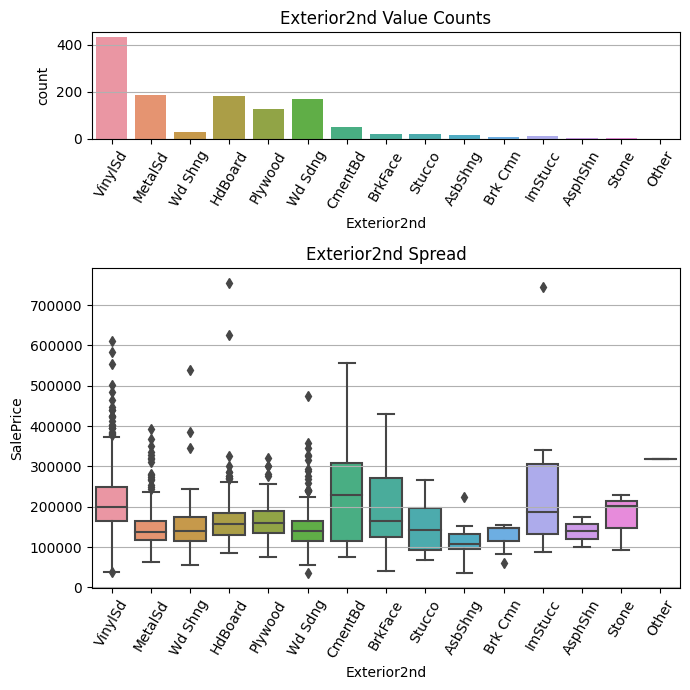

In [1162]:
count_box_plots('Exterior2nd', labelrotation=60)

#### MasVnrType

Masonry veneer type

In [1163]:
train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [1164]:
train['MasVnrType'].value_counts()

None       744
BrkFace    386
Stone      108
BrkCmn      14
Name: MasVnrType, dtype: int64

In [1165]:
train['MasVnrType'].isna().sum()

7

In [1166]:
train[train['MasVnrType'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
235           60       RL          NaN     7851   Pave      Reg         Lvl   
530           20       RL          NaN    32668   Pave      IR1         Lvl   
651           60       FV         65.0     8125   Pave      Reg         Lvl   
937           20       RL         67.0    10083   Pave      Reg         Lvl   
974           20       FV         95.0    11639   Pave      Reg         Lvl   
978          120       FV         35.0     4274   Pave      IR1         Lvl   
1244          20       RL        107.0    13891   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
235     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
530     AllPub   CulDSac       Gtl  ...        0    NaN   NaN         NaN   
651     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
937     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
974     AllPub    Corner       Gtl  ...        0    NaN   NaN         NaN   
978     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
1244    AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                               
235        0       5    2010        WD         Normal    216500  
530        0       3    2007        WD         Alloca    200624  
651        0       5    2008        WD         Normal    205950  
937        0       8    2009        WD         Normal    184900  
974        0      12    2008       New        Partial    182000  
978        0      11    2007       New        Partial    199900  
1244       0       9    2006       New        Partial    465000  

[7 rows x 79 columns]

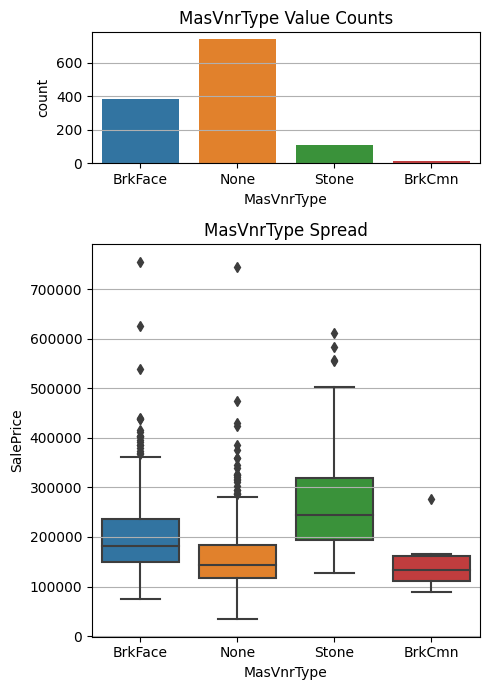

In [1167]:
count_box_plots('MasVnrType', figsize=(5,7))

#### MasVnrArea

Masonry veneer area in square feet

In [1168]:
train['MasVnrArea'].nunique()

291

In [1169]:
train['MasVnrArea'].value_counts()

0.0      743
72.0       8
108.0      8
180.0      7
120.0      7
        ... 
337.0      1
415.0      1
293.0      1
259.0      1
147.0      1
Name: MasVnrArea, Length: 291, dtype: int64

In [1170]:
train['MasVnrArea'].isna().sum()

7

In [1171]:
train[train['MasVnrArea'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
235           60       RL          NaN     7851   Pave      Reg         Lvl   
530           20       RL          NaN    32668   Pave      IR1         Lvl   
651           60       FV         65.0     8125   Pave      Reg         Lvl   
937           20       RL         67.0    10083   Pave      Reg         Lvl   
974           20       FV         95.0    11639   Pave      Reg         Lvl   
978          120       FV         35.0     4274   Pave      IR1         Lvl   
1244          20       RL        107.0    13891   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
235     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
530     AllPub   CulDSac       Gtl  ...        0    NaN   NaN         NaN   
651     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
937     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
974     AllPub    Corner       Gtl  ...        0    NaN   NaN         NaN   
978     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
1244    AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                               
235        0       5    2010        WD         Normal    216500  
530        0       3    2007        WD         Alloca    200624  
651        0       5    2008        WD         Normal    205950  
937        0       8    2009        WD         Normal    184900  
974        0      12    2008       New        Partial    182000  
978        0      11    2007       New        Partial    199900  
1244       0       9    2006       New        Partial    465000  

[7 rows x 79 columns]

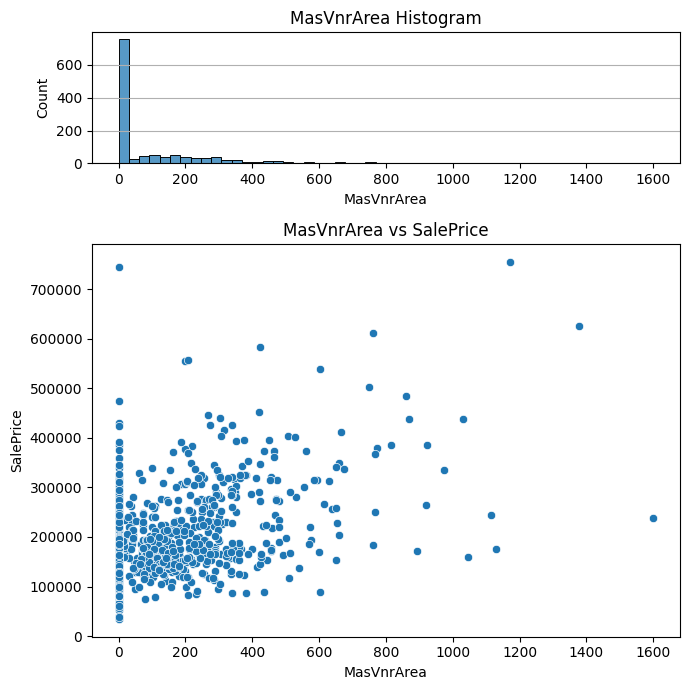

In [1172]:
hist_scatter_plots('MasVnrArea')

#### ExterQual

Exterior material quality

In [1173]:
train['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [1174]:
train['ExterQual'].value_counts()

TA    782
Gd    421
Ex     45
Fa     11
Name: ExterQual, dtype: int64

In [1175]:
train['ExterQual'].isna().sum()

0

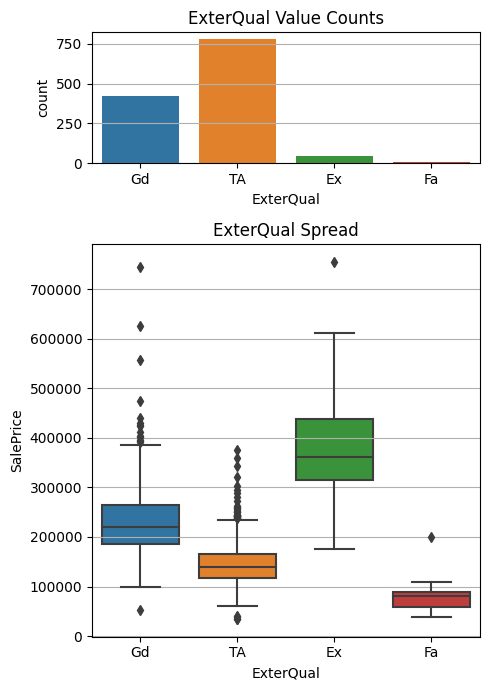

In [1176]:
count_box_plots('ExterQual', figsize=(5,7))

#### ExterCond

Present condition of the material on the exterior

In [1177]:
train['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [1178]:
train['ExterCond'].value_counts()

TA    1106
Gd     123
Fa      26
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [1179]:
train['ExterCond'].isna().sum()

0

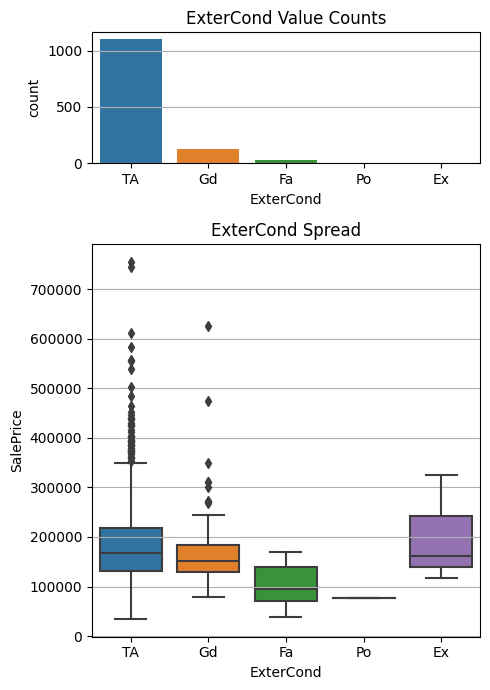

In [1180]:
count_box_plots('ExterCond', figsize=(5,7))

#### Foundation

Type of foundation

In [1181]:
train['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [1182]:
train['Foundation'].value_counts()

PConc     558
CBlock    549
BrkTil    122
Slab       23
Stone       4
Wood        3
Name: Foundation, dtype: int64

In [1183]:
train['Foundation'].isna().sum()

0

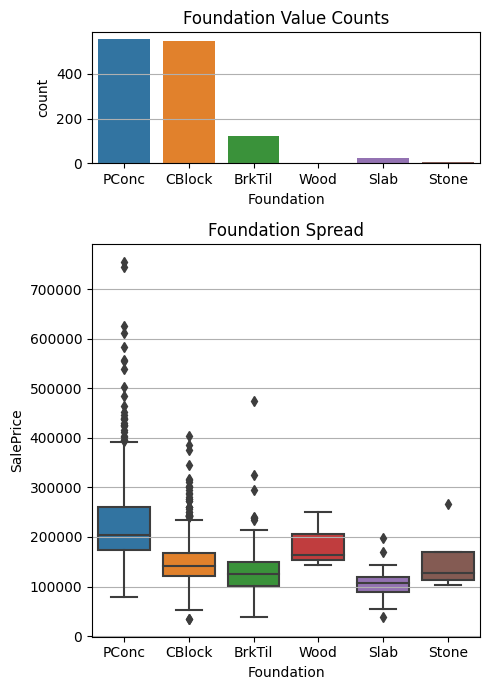

In [1184]:
count_box_plots('Foundation', figsize=(5,7))

#### BsmtQual

Height of the basement

In [1185]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [1186]:
train['BsmtQual'].value_counts()

TA    551
Gd    538
Ex    105
Fa     30
Name: BsmtQual, dtype: int64

In [1187]:
train['BsmtQual'].isna().sum()

35

In [1188]:
train[train['BsmtQual'].isna()].head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                           
18           90       RL         72.0    10791   Pave      Reg         Lvl   
40           90       RL         65.0     6040   Pave      Reg         Lvl   
91           20       RL         60.0     7200   Pave      Reg         Lvl   
103          90       RL         64.0     7018   Pave      Reg         Bnk   
157          20       RL         60.0     7200   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature  \
Id                                 ...                                     
18     AllPub    Inside       Gtl  ...        0    NaN   NaN        Shed   
40     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
91     AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
103    AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   
157    AllPub    Inside       Gtl  ...        0    NaN   NaN         NaN   

    MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                              
18      500      10    2006        WD         Normal     90000  
40        0       6    2008        WD        AdjLand     82000  
91        0       7    2006        WD         Normal    109900  
103       0       6    2009        WD         Alloca    118964  
157       0       6    2006        WD         Normal    109500  

[5 rows x 79 columns]

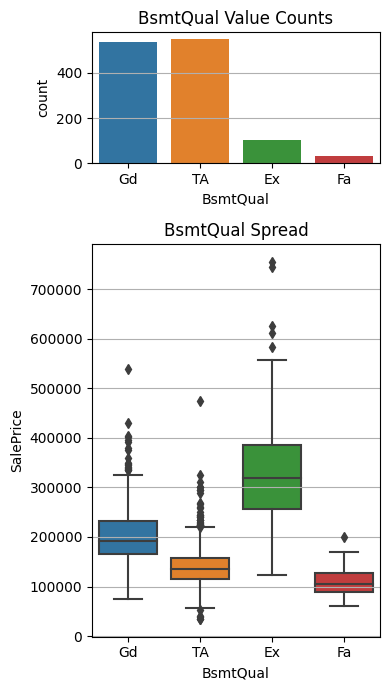

In [1189]:
count_box_plots('BsmtQual', figsize=(4,7))

#### BsmtCond

General condition of the basement

In [1190]:
train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [1191]:
train['BsmtCond'].value_counts()

TA    1128
Gd      55
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [1192]:
train['BsmtCond'].isna().sum()

35

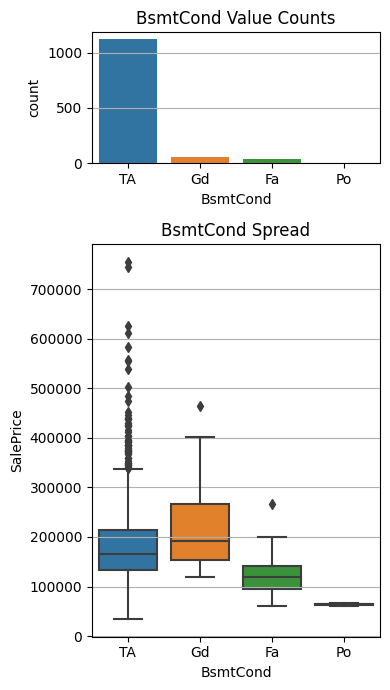

In [1193]:
count_box_plots('BsmtCond', figsize=(4,7))

#### BsmtExposure

Walkout or garden level basement walls

In [1194]:
train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [1195]:
train['BsmtExposure'].value_counts()

No    817
Av    187
Gd    118
Mn    101
Name: BsmtExposure, dtype: int64

In [1196]:
train['BsmtExposure'].isna().sum()

36

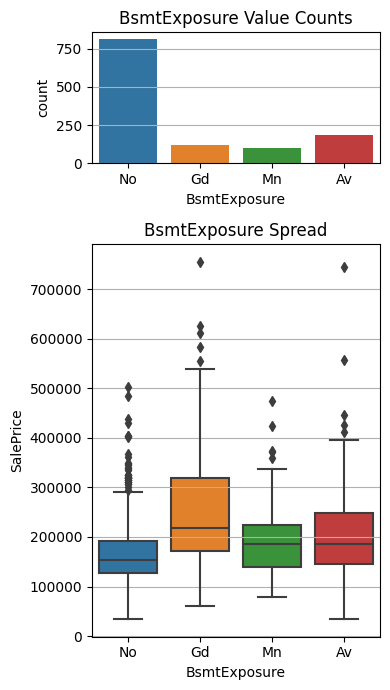

In [1197]:
count_box_plots('BsmtExposure', figsize=(4,7))

#### BsmtFinType1

Quality of basement finished area

In [1198]:
train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [1199]:
train['BsmtFinType1'].value_counts()

Unf    363
GLQ    362
ALQ    191
BLQ    128
Rec    116
LwQ     64
Name: BsmtFinType1, dtype: int64

In [1200]:
train['BsmtFinType1'].isna().sum()

35

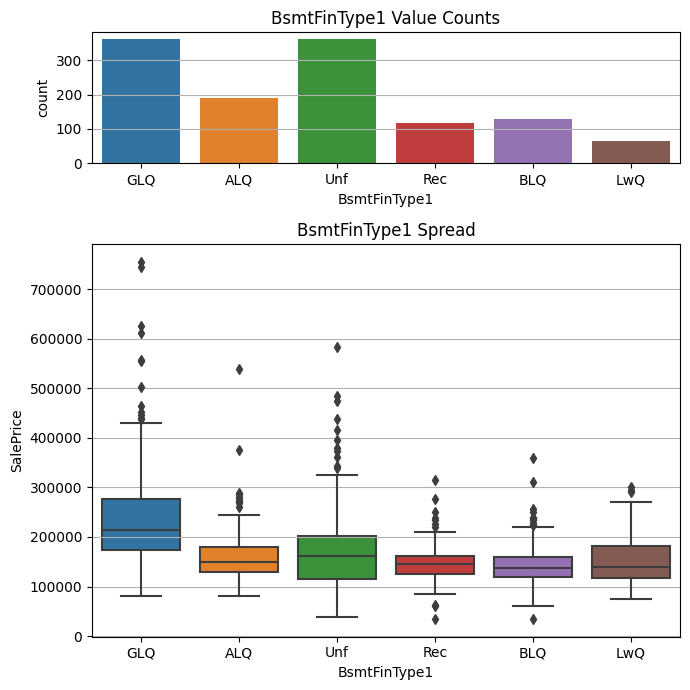

In [1201]:
count_box_plots('BsmtFinType1')

#### BsmtFinSF1

Type 1 finished square feet

In [1202]:
train['BsmtFinSF1'].nunique()

584

In [1203]:
train['BsmtFinSF1'].value_counts()

0       398
24       12
16        9
662       5
20        5
       ... 
605       1
607       1
608       1
609       1
1904      1
Name: BsmtFinSF1, Length: 584, dtype: int64

In [1204]:
train['BsmtFinSF1'].isna().sum()

0

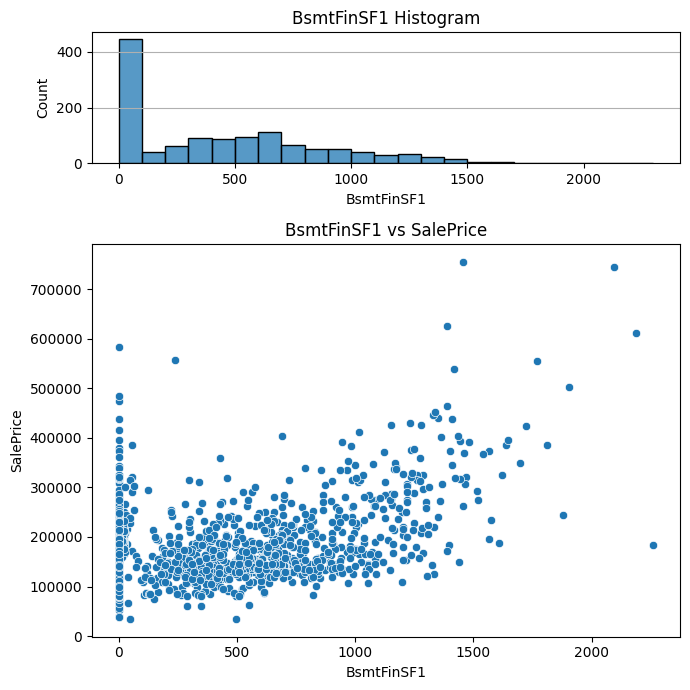

In [1205]:
hist_scatter_plots('BsmtFinSF1', binwidth=100)

#### BsmtFinType2

Quality of second finished area (if present)

In [1206]:
train['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [1207]:
train['BsmtFinType2'].value_counts()

Unf    1081
Rec      40
LwQ      40
BLQ      31
ALQ      18
GLQ      13
Name: BsmtFinType2, dtype: int64

In [1208]:
train['BsmtFinType2'].isna().sum()

36

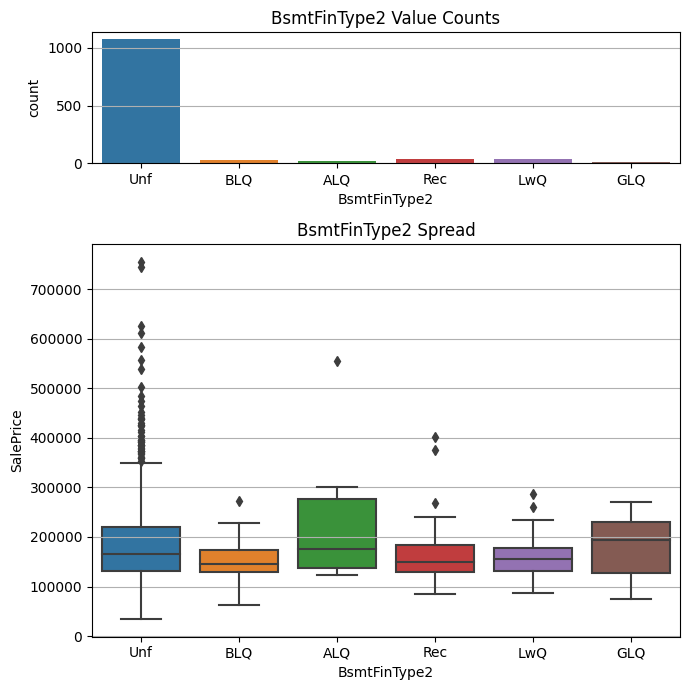

In [1209]:
count_box_plots('BsmtFinType2')

#### BsmtFinSF2

Type 2 finished square feet

In [1210]:
train['BsmtFinSF2'].nunique()

123

In [1211]:
train['BsmtFinSF2'].value_counts()

0       1116
180        5
279        2
539        2
480        2
        ... 
768        1
469        1
472        1
479        1
1474       1
Name: BsmtFinSF2, Length: 123, dtype: int64

In [1212]:
train['BsmtFinSF2'].isna().sum()

0

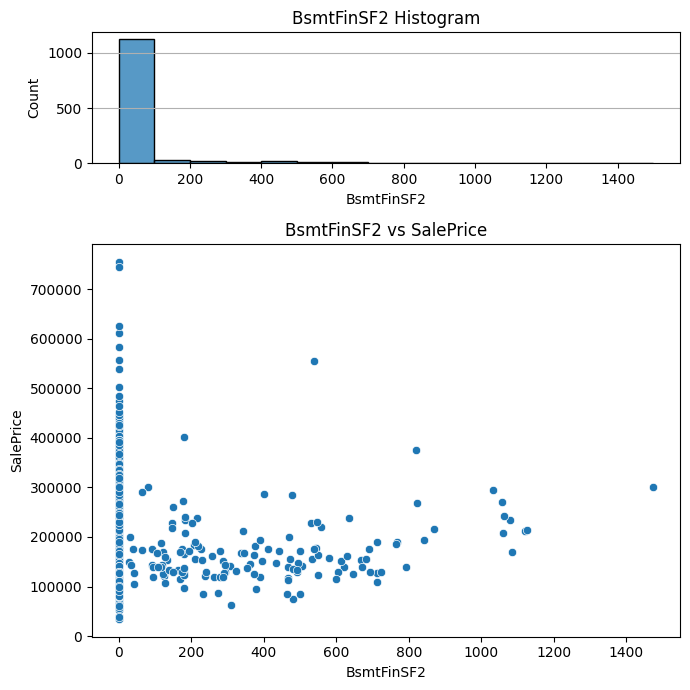

In [1213]:
hist_scatter_plots('BsmtFinSF2', binwidth=100)

#### BsmtUnfSF

Unfinished square feet of basement area

In [1214]:
train['BsmtUnfSF'].nunique()

712

In [1215]:
train['BsmtUnfSF'].value_counts()

0      106
728      8
572      7
270      6
440      6
      ... 
785      1
784      1
779      1
778      1
595      1
Name: BsmtUnfSF, Length: 712, dtype: int64

In [1216]:
train['BsmtUnfSF'].isna().sum()

0

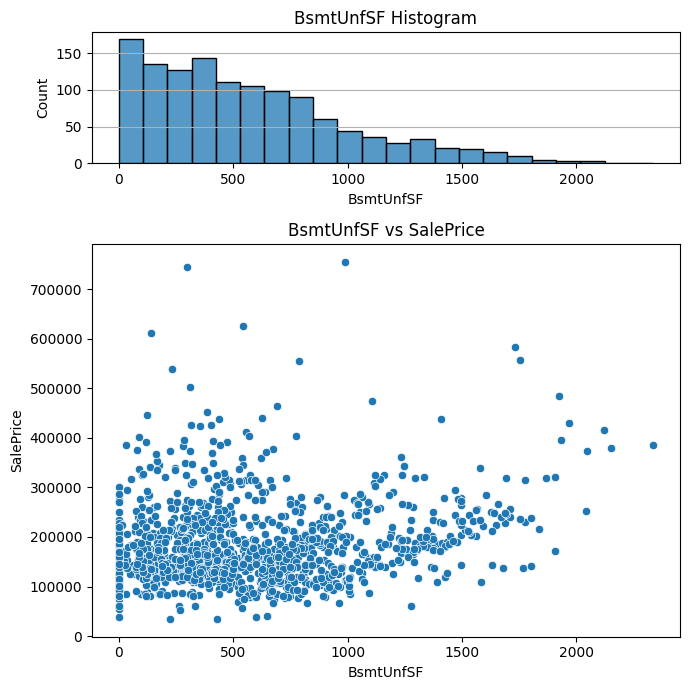

In [1217]:
hist_scatter_plots('BsmtUnfSF')

#### TotalBsmtSF

Total square feet of basement area

In [1218]:
train['TotalBsmtSF'].nunique()

661

In [1219]:
train['TotalBsmtSF'].value_counts()

0       35
864     28
672     16
912     13
1040    13
        ..
1103     1
1105     1
1106     1
1109     1
2046     1
Name: TotalBsmtSF, Length: 661, dtype: int64

In [1220]:
train['TotalBsmtSF'].isna().sum()

0

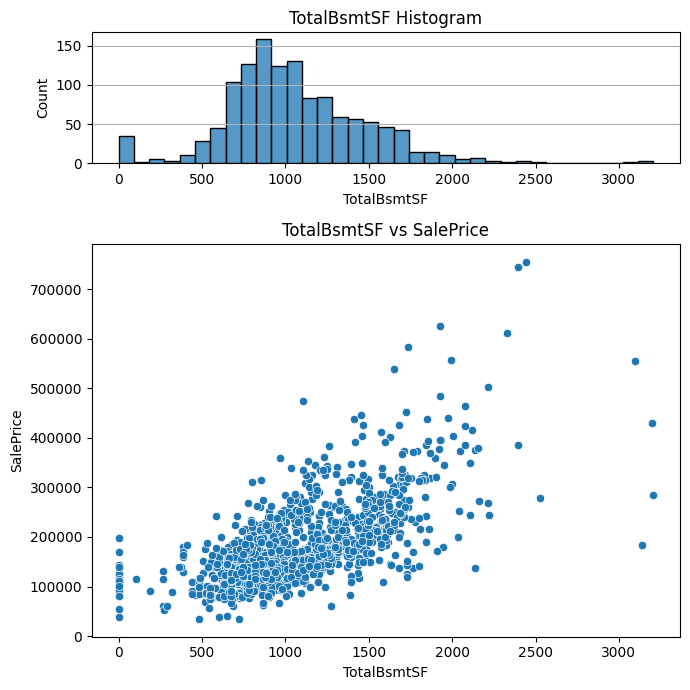

In [1221]:
hist_scatter_plots('TotalBsmtSF')

#### Heating

Type of heating

In [1222]:
train['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW'], dtype=object)

In [1223]:
train['Heating'].value_counts()

GasA    1235
GasW      15
Grav       5
Wall       3
OthW       1
Name: Heating, dtype: int64

In [1224]:
train['Heating'].isna().sum()

0

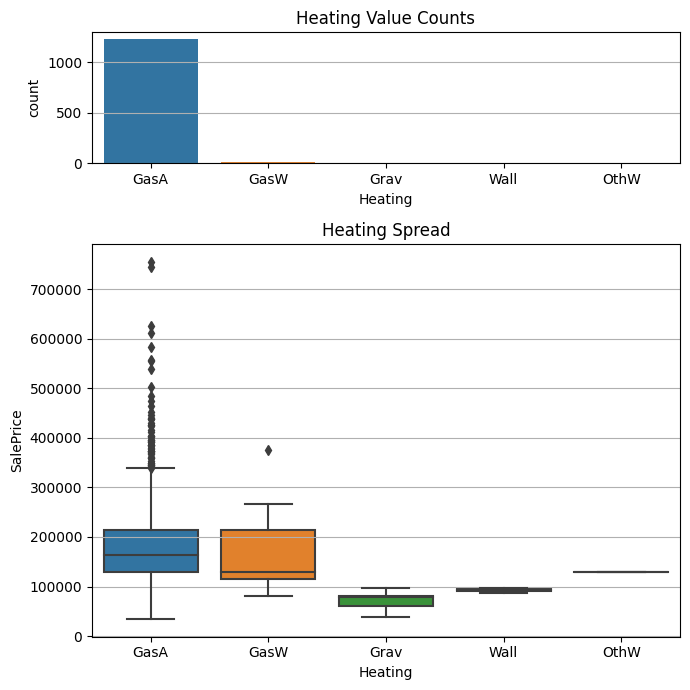

In [1225]:
count_box_plots('Heating')

#### HeatingQC

Heating quality and condition

In [1226]:
train['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [1227]:
train['HeatingQC'].value_counts()

Ex    635
TA    375
Gd    209
Fa     39
Po      1
Name: HeatingQC, dtype: int64

In [1228]:
train['HeatingQC'].isna().sum()

0

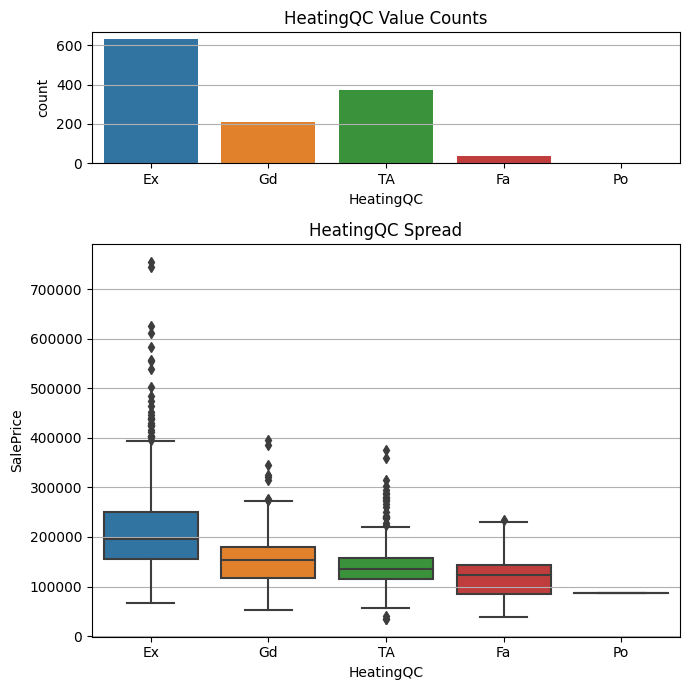

In [1229]:
count_box_plots('HeatingQC')

#### CentralAir

Central air conditioning

In [1230]:
train['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [1231]:
train['CentralAir'].value_counts()

Y    1177
N      82
Name: CentralAir, dtype: int64

In [1232]:
train['CentralAir'].isna().sum()

0

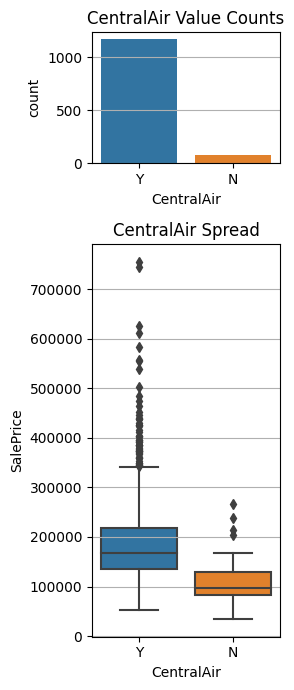

In [1233]:
count_box_plots('CentralAir', figsize=(3,7))

#### Electrical

Electrical system

In [1234]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [1235]:
train['Electrical'].value_counts()

SBrkr    1150
FuseA      83
FuseF      22
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1236]:
train['Electrical'].isna().sum()

0

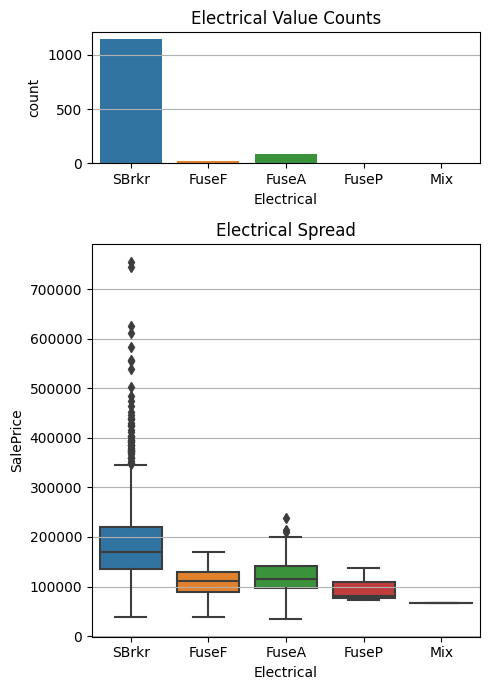

In [1237]:
count_box_plots('Electrical', figsize=(5,7))

#### 1stFlrSF

First Floor square feet

In [1238]:
train['Electrical'].nunique()

5

In [1239]:
train['1stFlrSF'].value_counts()

864     20
912     13
1040    13
894     12
672     11
        ..
1297     1
1299     1
1304     1
1307     1
1138     1
Name: 1stFlrSF, Length: 698, dtype: int64

In [1240]:
train['1stFlrSF'].isna().sum()

0

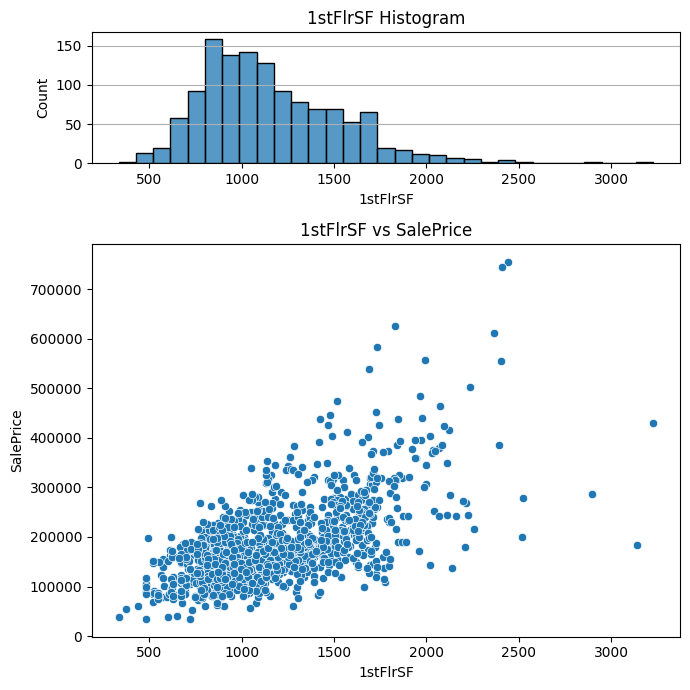

In [1241]:
hist_scatter_plots('1stFlrSF')

#### 2ndFlrSF

Second floor square feet

In [1242]:
train['2ndFlrSF'].nunique()

369

In [1243]:
train['2ndFlrSF'].value_counts()

0       721
728       9
504       8
546       8
720       7
       ... 
882       1
883       1
885       1
1274      1
1872      1
Name: 2ndFlrSF, Length: 369, dtype: int64

In [1244]:
train['2ndFlrSF'].isna().sum()

0

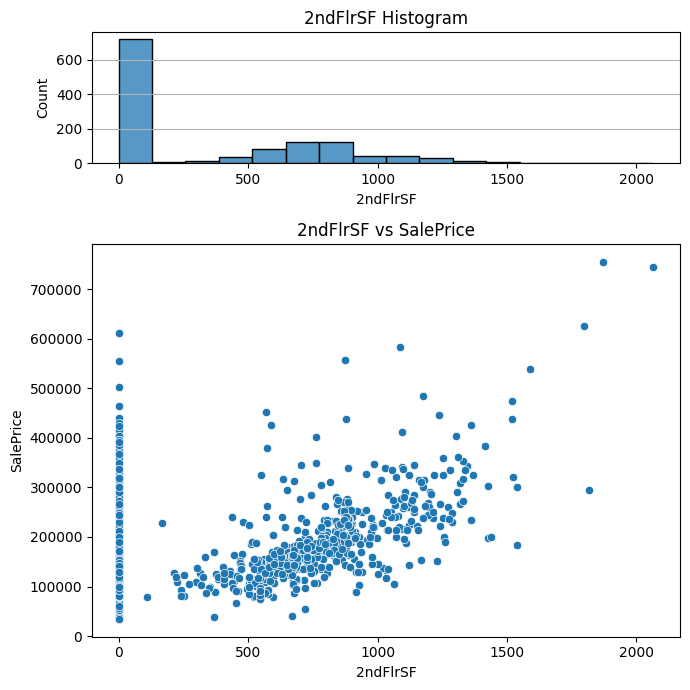

In [1245]:
hist_scatter_plots('2ndFlrSF')

#### LowQualFinSF

Low quality finished square feet (all floors)

In [1246]:
train['LowQualFinSF'].nunique()

22

In [1247]:
train['LowQualFinSF'].value_counts()

0      1236
80        2
360       2
528       1
53        1
120       1
144       1
156       1
232       1
234       1
371       1
572       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
390       1
Name: LowQualFinSF, dtype: int64

In [1248]:
train['LowQualFinSF'].isna().sum()

0

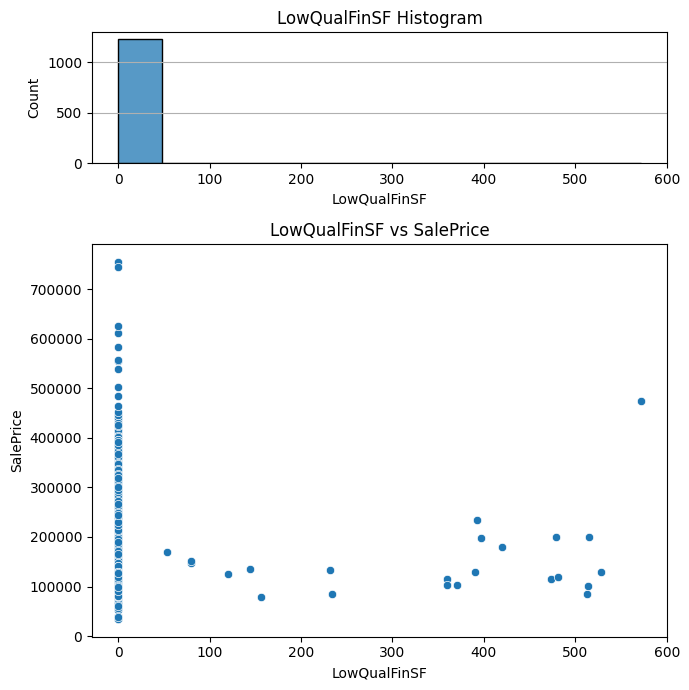

In [1249]:
hist_scatter_plots('LowQualFinSF')

#### GrLivArea

Above grade (ground) living area square feet

In [1250]:
train['GrLivArea'].nunique()

790

In [1251]:
train['GrLivArea'].value_counts()

864     18
1040    12
894     11
1456     9
912      9
        ..
1240     1
1241     1
1242     1
1244     1
2054     1
Name: GrLivArea, Length: 790, dtype: int64

In [1252]:
train['GrLivArea'].isna().sum()

0

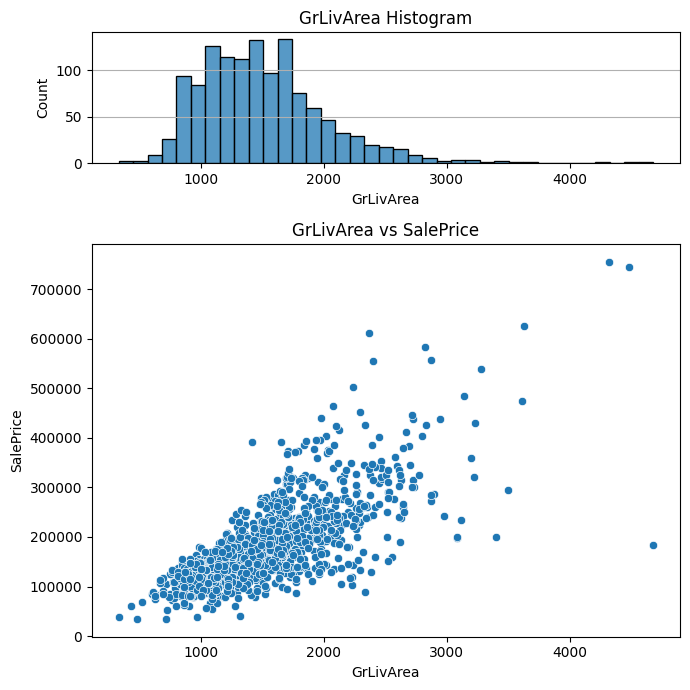

In [1253]:
hist_scatter_plots('GrLivArea')

#### BsmtFullBath

Basement full bathrooms

In [1254]:
train['BsmtFullBath'].unique()

array([1, 0, 2, 3])

In [1255]:
train['BsmtFullBath'].value_counts()

0    744
1    501
2     13
3      1
Name: BsmtFullBath, dtype: int64

In [1256]:
train['BsmtFullBath'].isna().sum()

0

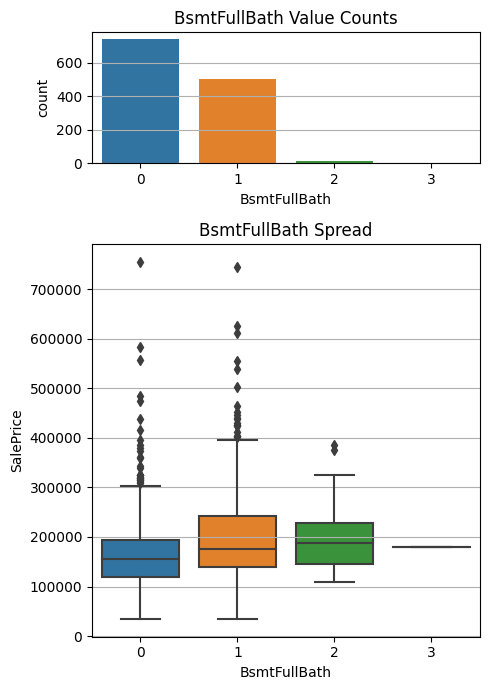

In [1257]:
count_box_plots('BsmtFullBath', figsize=(5,7))

#### BsmtHalfBath

Basement half bathrooms

In [1258]:
train['BsmtHalfBath'].unique()

array([0, 1, 2])

In [1259]:
train['BsmtHalfBath'].value_counts()

0    1185
1      72
2       2
Name: BsmtHalfBath, dtype: int64

In [1260]:
train['BsmtHalfBath'].isna().sum()

0

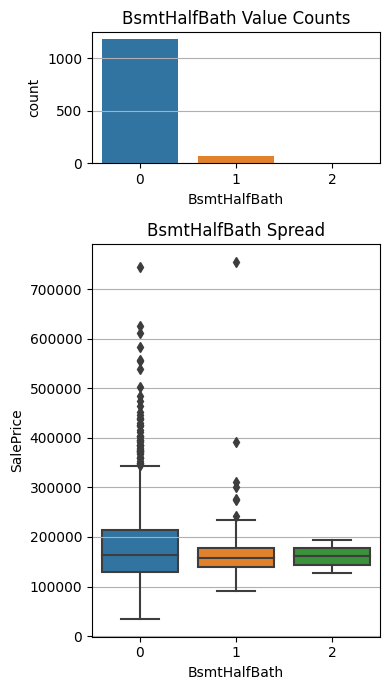

In [1261]:
count_box_plots('BsmtHalfBath', figsize=(4,7))

#### FullBath

Full bathrooms above grade

In [1262]:
train['FullBath'].unique()

array([2, 1, 3, 0])

In [1263]:
train['FullBath'].value_counts()

2    654
1    568
3     29
0      8
Name: FullBath, dtype: int64

In [1264]:
train['FullBath'].isna().sum()

0

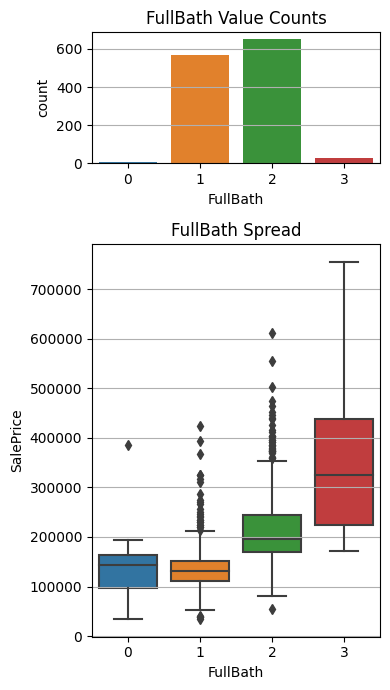

In [1265]:
count_box_plots('FullBath', figsize=(4,7))

#### HalfBath

Half baths above grade

In [1266]:
train['HalfBath'].unique()

array([1, 0, 2])

In [1267]:
train['HalfBath'].value_counts()

0    787
1    463
2      9
Name: HalfBath, dtype: int64

In [1268]:
train['HalfBath'].isna().sum()

0

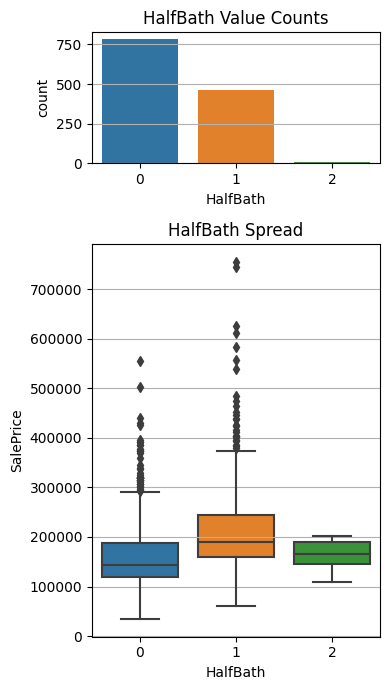

In [1269]:
count_box_plots('HalfBath', figsize=(4,7))

#### BedroomAbvGr

Number of bedrooms above basement level

In [1270]:
train['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

In [1271]:
train['BedroomAbvGr'].value_counts()

3    693
2    312
4    180
1     45
5     17
6      6
0      5
8      1
Name: BedroomAbvGr, dtype: int64

In [1272]:
train['BedroomAbvGr'].isna().sum()

0

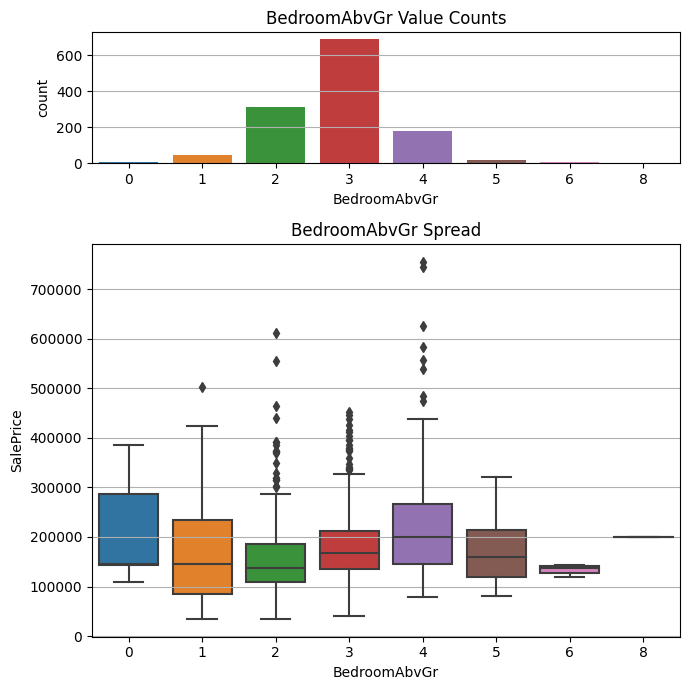

In [1273]:
count_box_plots('BedroomAbvGr')

#### KitchenAbvGr

Number of kitchens

In [1274]:
train['KitchenAbvGr'].unique()

array([1, 2, 3, 0])

In [1275]:
train['KitchenAbvGr'].value_counts()

1    1202
2      54
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [1276]:
train['KitchenAbvGr'].isna().sum()

0

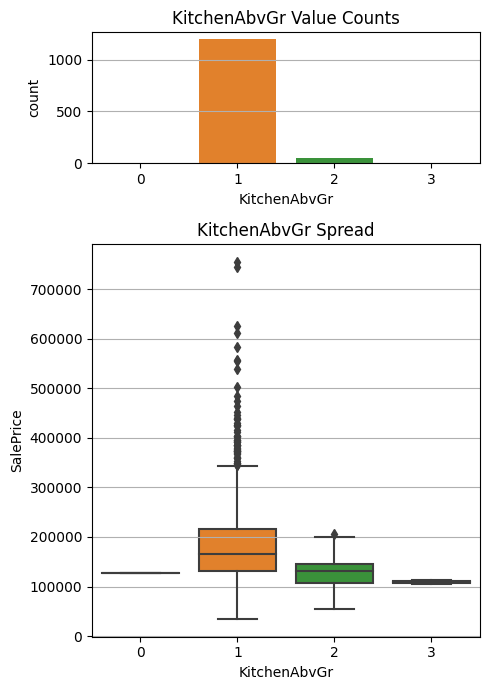

In [1277]:
count_box_plots('KitchenAbvGr', figsize=(5,7))

#### KitchenQual

Kitchen quality

In [1278]:
train['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [1279]:
train['KitchenQual'].value_counts()

TA    635
Gd    504
Ex     85
Fa     35
Name: KitchenQual, dtype: int64

In [1280]:
train['KitchenQual'].isna().sum()

0

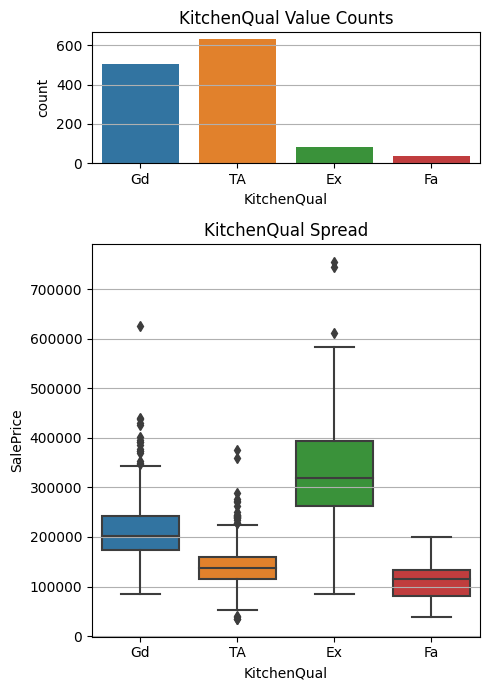

In [1281]:
count_box_plots('KitchenQual', figsize=(5,7))

#### TotRmsAbvGrd

Total rooms above grade (does not include bathrooms)

In [1282]:
train['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

In [1283]:
train['TotRmsAbvGrd'].value_counts()

6     351
7     283
5     240
8     155
4      87
9      65
10     41
11     14
3      13
12      8
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [1284]:
train['TotRmsAbvGrd'].isna().sum()

0

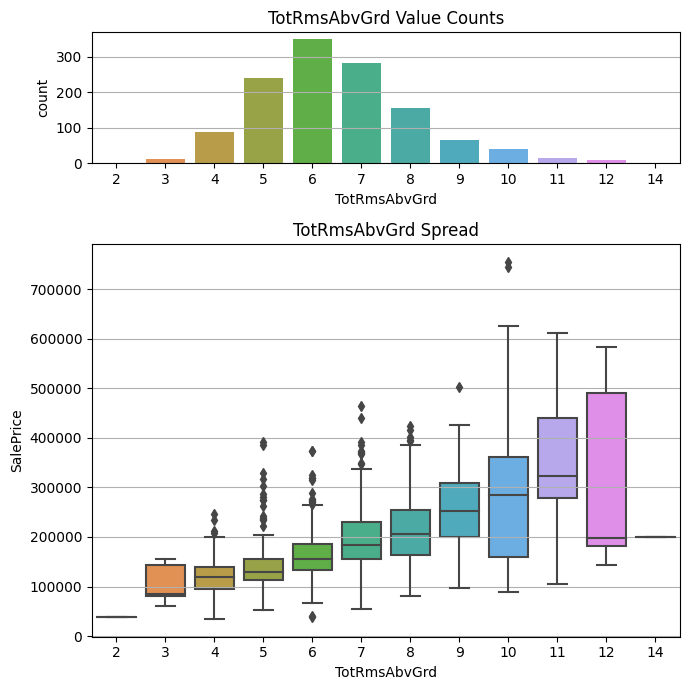

In [1285]:
count_box_plots('TotRmsAbvGrd')

#### Functional

Home functionality rating

In [1286]:
train['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [1287]:
train['Functional'].value_counts()

Typ     1174
Min2      28
Min1      25
Mod       13
Maj1      13
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [1288]:
train['Functional'].isna().sum()

0

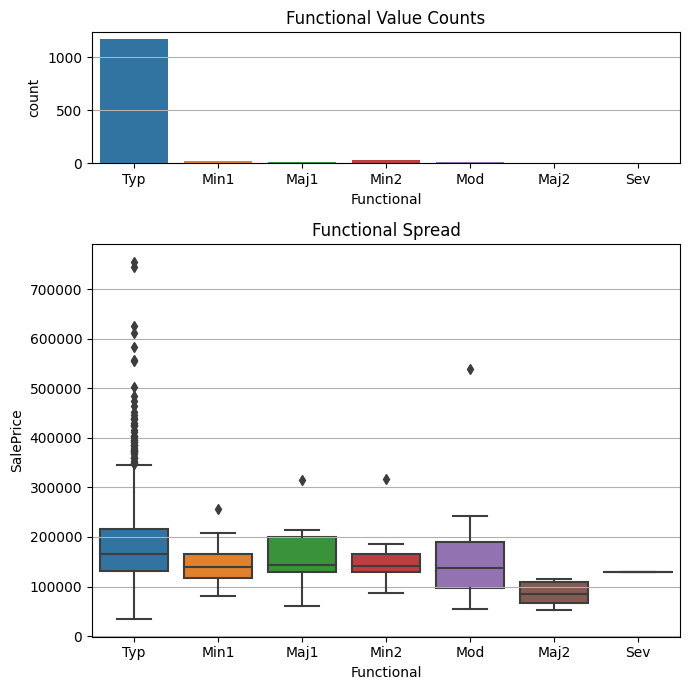

In [1289]:
count_box_plots('Functional')

#### Fireplaces

Number of fireplaces

In [1290]:
train['Fireplaces'].unique()

array([0, 1, 2, 3])

In [1291]:
train['Fireplaces'].value_counts()

0    599
1    559
2     97
3      4
Name: Fireplaces, dtype: int64

In [1292]:
train['Fireplaces'].isna().sum()

0

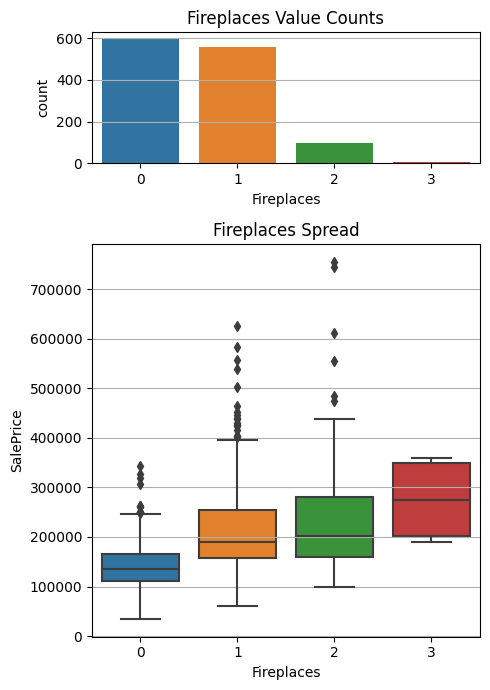

In [1293]:
count_box_plots('Fireplaces', figsize=(5,7))

#### FireplaceQu

Fireplace quality

In [1294]:
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [1295]:
train['FireplaceQu'].value_counts()

Gd    323
TA    270
Fa     30
Po     19
Ex     18
Name: FireplaceQu, dtype: int64

In [1296]:
train['FireplaceQu'].isna().sum()

599

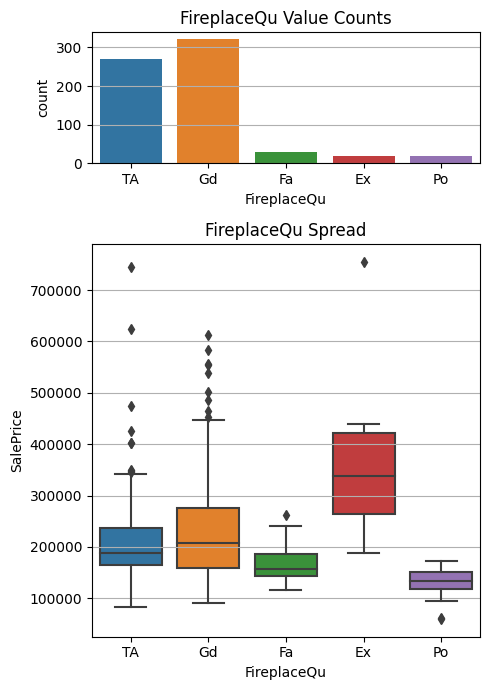

In [1297]:
count_box_plots('FireplaceQu', figsize=(5,7))

In [1298]:
train = train.drop('FireplaceQu', axis=1)

#### GarageType

Garage location

In [1299]:
train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [1300]:
train['GarageType'].value_counts()

Attchd     753
Detchd     328
BuiltIn     76
Basment     16
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1301]:
train['GarageType'].isna().sum()

71

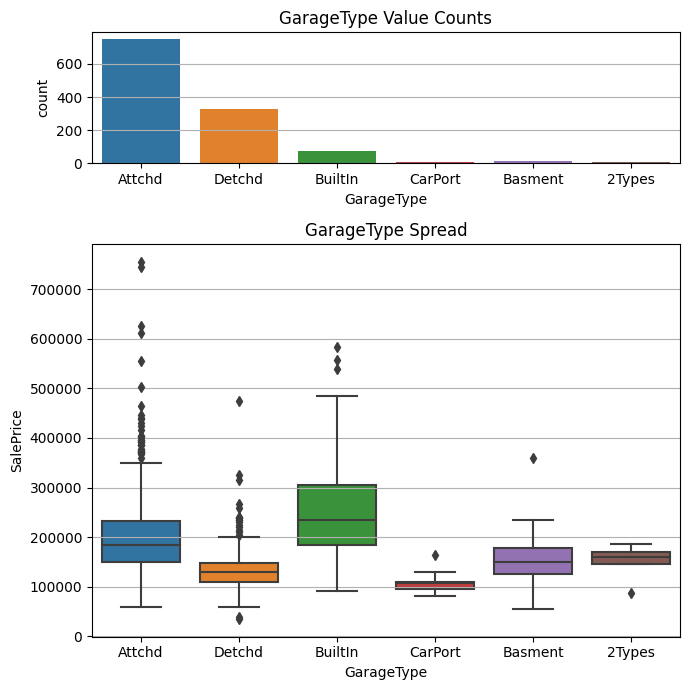

In [1302]:
count_box_plots('GarageType')

#### GarageYrBlt

Year garage was built

In [1303]:
train['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908.])

In [1304]:
train['GarageYrBlt'].value_counts()

2005.0    54
2006.0    50
2004.0    45
2003.0    45
2007.0    42
          ..
1906.0     1
1927.0     1
1942.0     1
1900.0     1
1908.0     1
Name: GarageYrBlt, Length: 95, dtype: int64

In [1305]:
train['GarageYrBlt'].isna().sum()

71

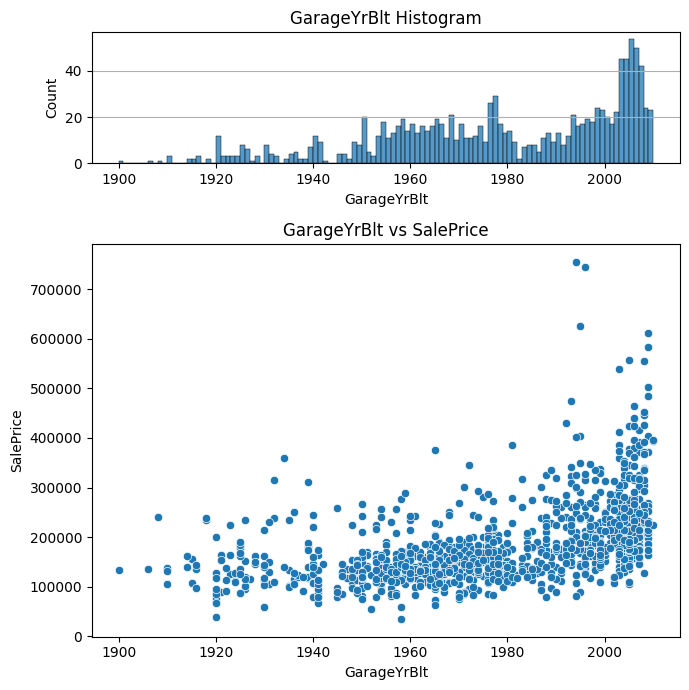

In [1306]:
hist_scatter_plots('GarageYrBlt', binwidth=1)

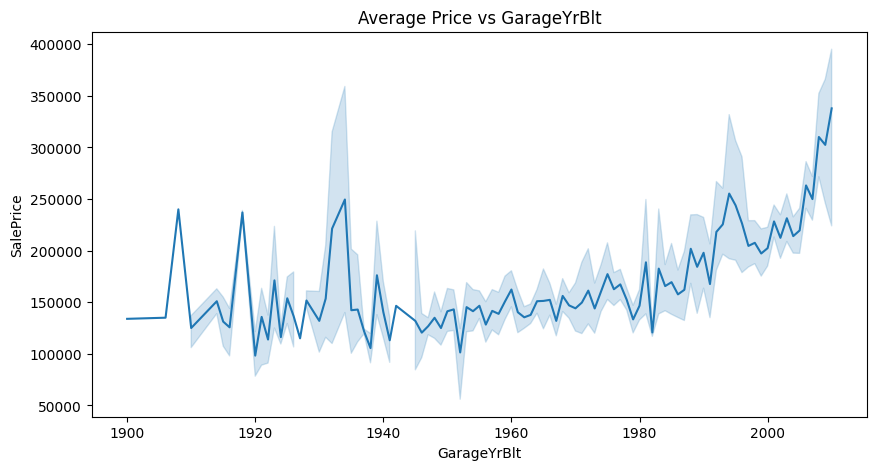

In [1307]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Average Price vs GarageYrBlt')
sns.lineplot(data=train, x="GarageYrBlt", y="SalePrice")
plt.show()

#### GarageFinish

Interior finish of the garage

In [1308]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [1309]:
train['GarageFinish'].value_counts()

Unf    524
RFn    359
Fin    305
Name: GarageFinish, dtype: int64

In [1310]:
train['GarageFinish'].isna().sum()

71

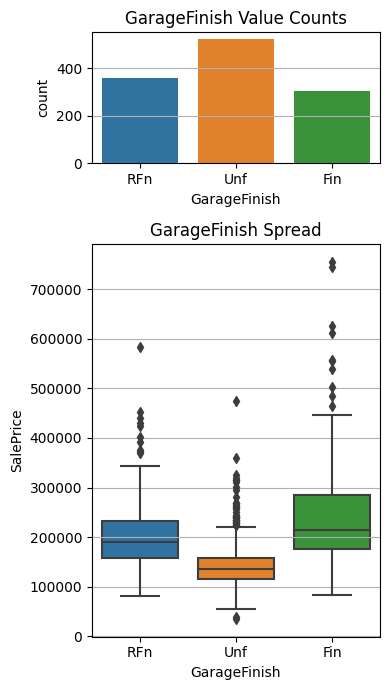

In [1311]:
count_box_plots('GarageFinish',figsize=(4,7))

#### GarageCars

Size of garage in car capacity

In [1312]:
train['GarageCars'].unique()

array([2, 3, 1, 0, 4])

In [1313]:
train['GarageCars'].value_counts()

2    713
1    319
3    153
0     71
4      3
Name: GarageCars, dtype: int64

In [1314]:
train['GarageCars'].isna().sum()

0

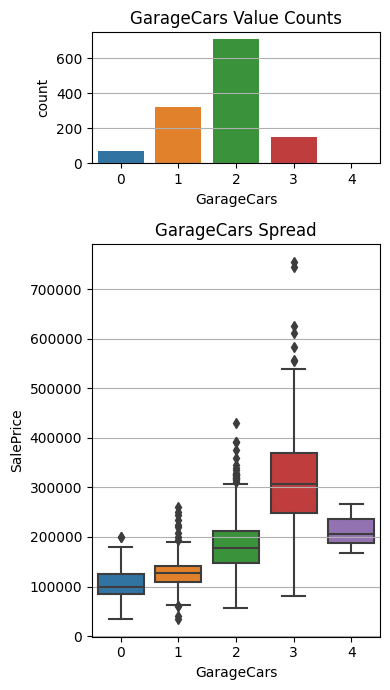

In [1315]:
count_box_plots('GarageCars',figsize=(4,7))

#### GarageArea

Size of garage in square feet

In [1316]:
train['GarageArea'].nunique()

413

In [1317]:
train['GarageArea'].value_counts()

0       71
440     43
576     42
240     33
484     29
        ..
740      1
467      1
466      1
746      1
1390     1
Name: GarageArea, Length: 413, dtype: int64

In [1318]:
train['GarageArea'].isna().sum()

0

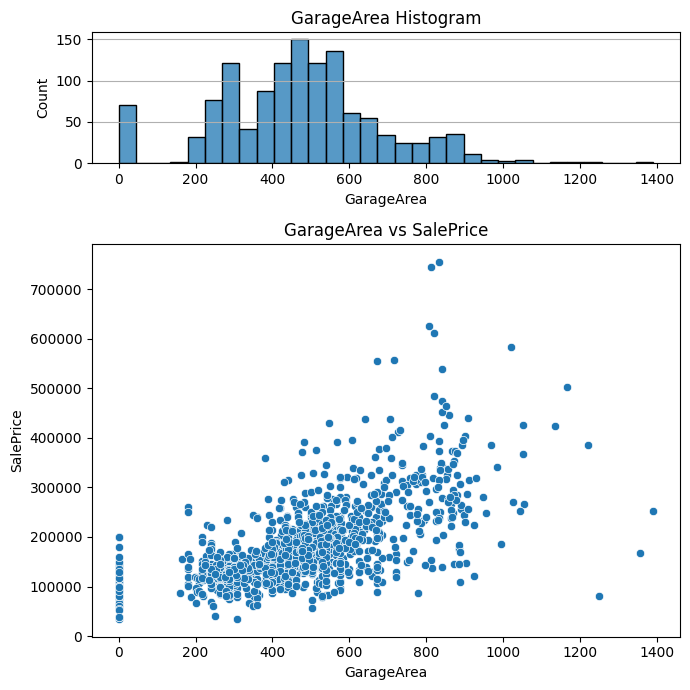

In [1319]:
hist_scatter_plots('GarageArea')

#### GarageQual

Garage quality

In [1320]:
train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [1321]:
train['GarageQual'].value_counts()

TA    1134
Fa      39
Gd       9
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [1322]:
train['GarageQual'].isna().sum()

71

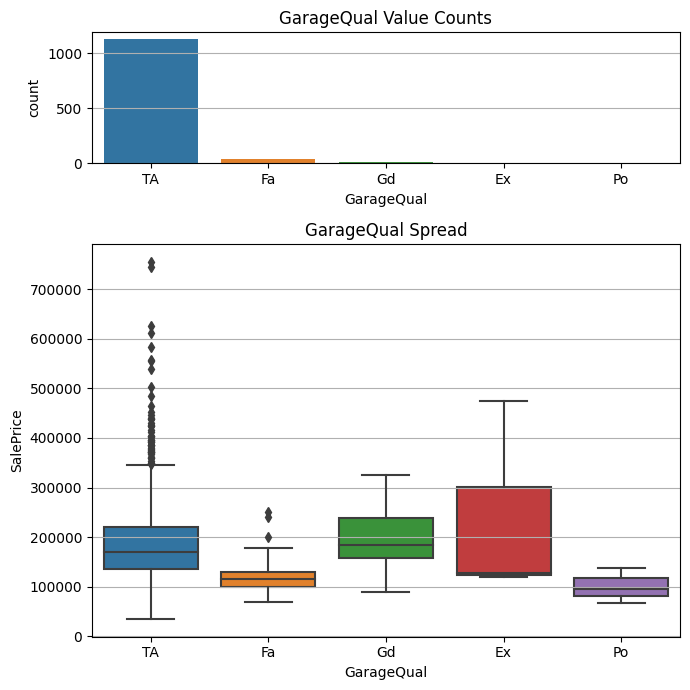

In [1323]:
count_box_plots('GarageQual')

#### GarageCond

Garage condition

In [1324]:
train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [1325]:
train['GarageCond'].value_counts()

TA    1146
Fa      28
Po       6
Gd       6
Ex       2
Name: GarageCond, dtype: int64

In [1326]:
train['GarageCond'].isna().sum()

71

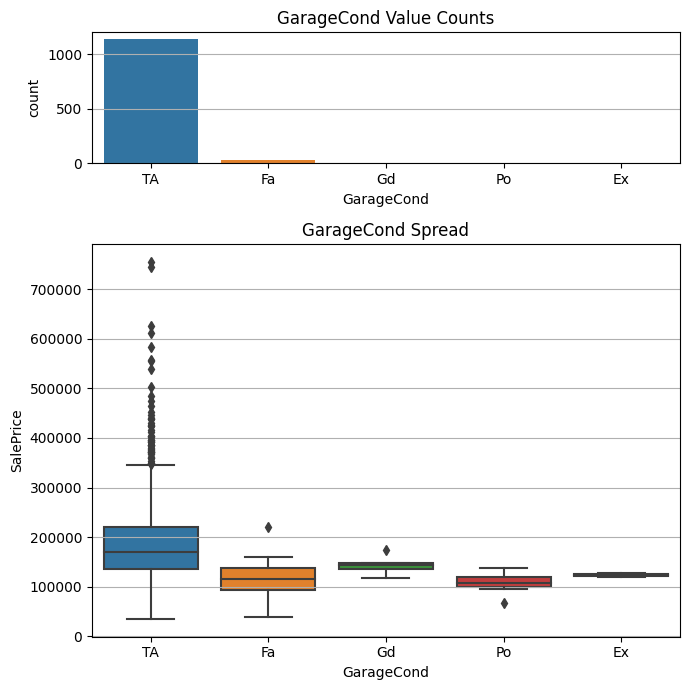

In [1327]:
count_box_plots('GarageCond')

#### PavedDrive

Paved driveway

In [1328]:
train['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [1329]:
train['PavedDrive'].value_counts()

Y    1158
N      76
P      25
Name: PavedDrive, dtype: int64

In [1330]:
train['PavedDrive'].isna().sum()

0

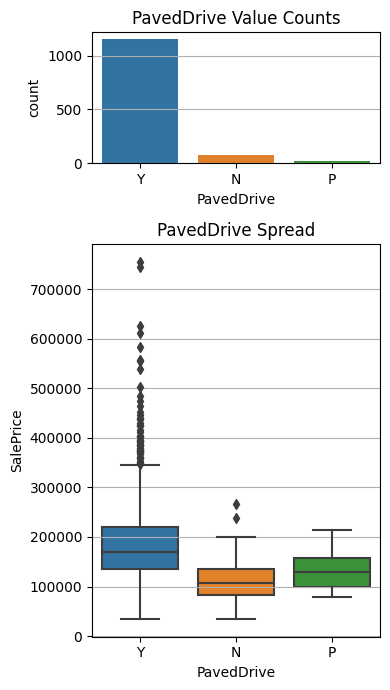

In [1331]:
count_box_plots('PavedDrive', figsize=(4,7))

#### WoodDeckSF

Wood deck area in square feet

In [1332]:
train['WoodDeckSF'].nunique()

252

In [1333]:
train['WoodDeckSF'].value_counts()

0      649
192     35
100     32
120     30
144     29
      ... 
333      1
176      1
173      1
340      1
857      1
Name: WoodDeckSF, Length: 252, dtype: int64

In [1334]:
train['WoodDeckSF'].isna().sum()

0

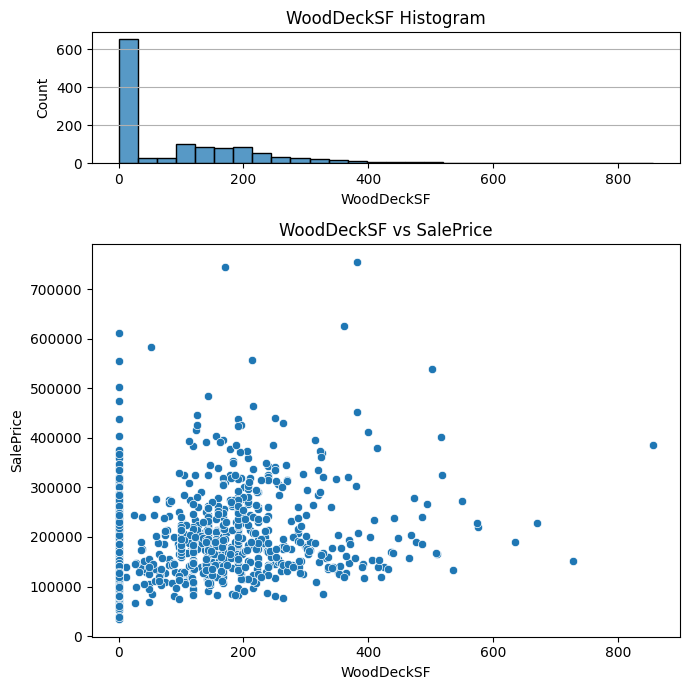

In [1335]:
hist_scatter_plots('WoodDeckSF')

#### OpenPorchSF

Open porch area in square feet

In [1336]:
train['OpenPorchSF'].nunique()

188

In [1337]:
train['OpenPorchSF'].value_counts()

0      574
48      22
36      20
20      17
40      16
      ... 
191      1
189      1
101      1
188      1
523      1
Name: OpenPorchSF, Length: 188, dtype: int64

In [1338]:
train['OpenPorchSF'].isna().sum()

0

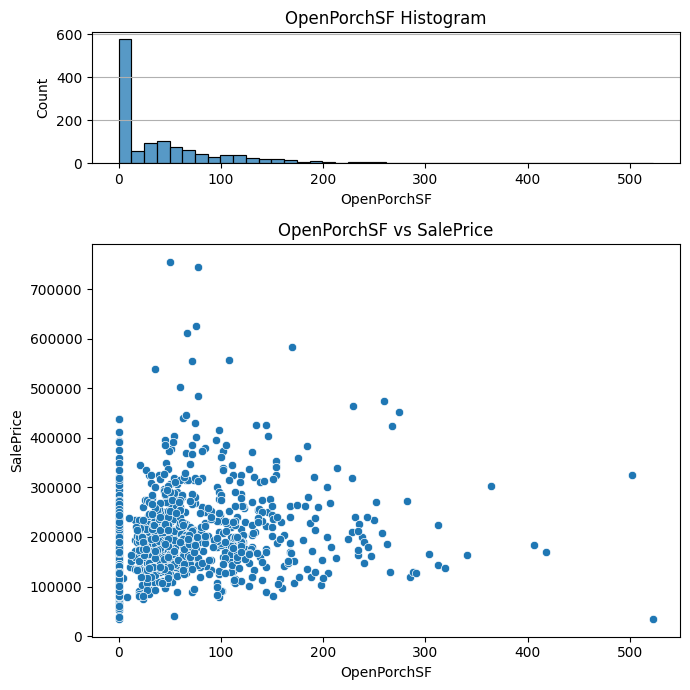

In [1339]:
hist_scatter_plots('OpenPorchSF')

#### EnclosedPorch

Enclosed porch area in square feet

In [1340]:
train['EnclosedPorch'].nunique()

107

In [1341]:
train['EnclosedPorch'].value_counts()

0      1082
112      12
192       5
96        5
120       5
       ... 
170       1
172       1
174       1
177       1
552       1
Name: EnclosedPorch, Length: 107, dtype: int64

In [1342]:
train['EnclosedPorch'].isna().sum()

0

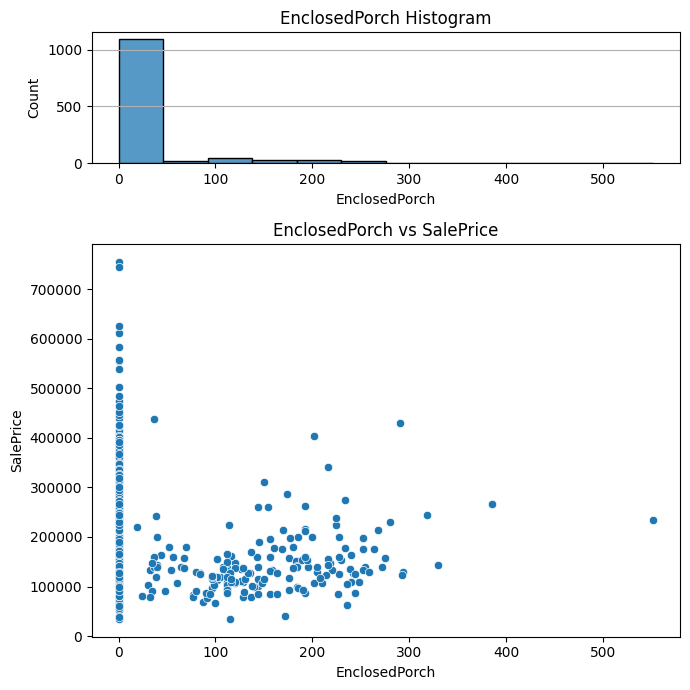

In [1343]:
hist_scatter_plots('EnclosedPorch')

#### 3SsnPorch

Three season porch area in square feet

In [1344]:
train['3SsnPorch'].nunique()

18

In [1345]:
train['3SsnPorch'].value_counts()

0      1237
168       3
216       2
180       2
144       2
320       1
245       1
238       1
196       1
182       1
407       1
162       1
153       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [1346]:
train['3SsnPorch'].isna().sum()

0

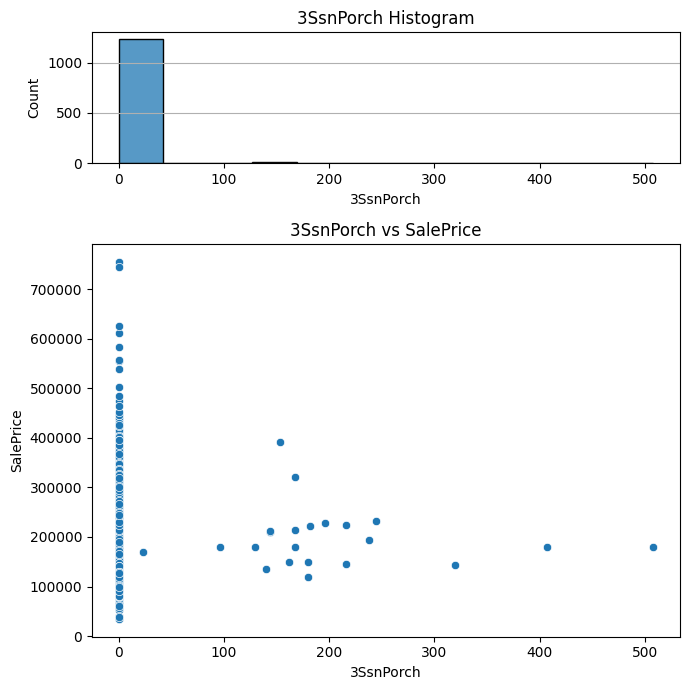

In [1347]:
hist_scatter_plots('3SsnPorch')

#### ScreenPorch

Screen porch area in square feet

In [1348]:
train['ScreenPorch'].nunique()

65

In [1349]:
train['ScreenPorch'].value_counts()

0      1161
192       6
120       4
189       4
224       4
       ... 
210       1
204       1
197       1
190       1
185       1
Name: ScreenPorch, Length: 65, dtype: int64

In [1350]:
train['ScreenPorch'].isna().sum()

0

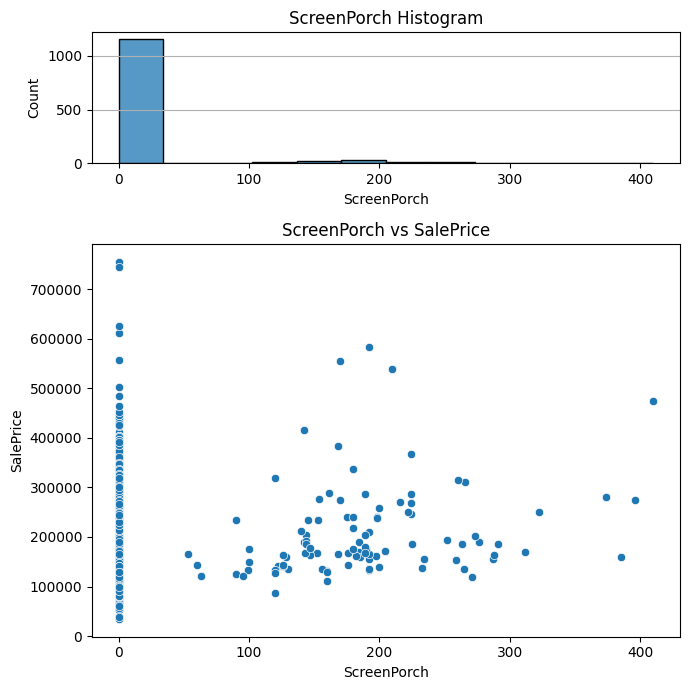

In [1351]:
hist_scatter_plots('ScreenPorch')

#### PoolArea

Pool area in square feet

In [1352]:
train['PoolArea'].unique()

array([  0, 512, 648, 576, 555])

In [1353]:
train['PoolArea'].value_counts()

0      1255
648       1
576       1
555       1
512       1
Name: PoolArea, dtype: int64

In [1354]:
train['PoolArea'].isna().sum()

0

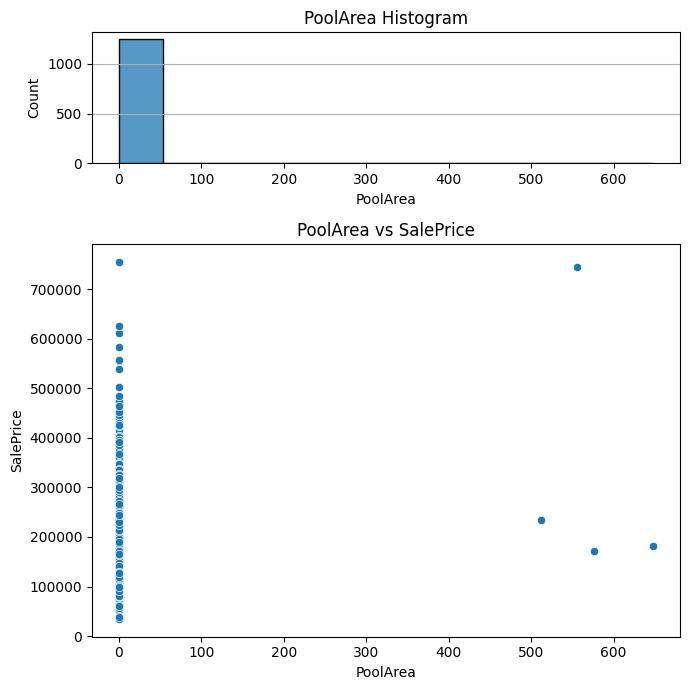

In [1355]:
hist_scatter_plots('PoolArea')

#### PoolQC

Pool quality

In [1356]:
train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [1357]:
train['PoolQC'].value_counts()

Ex    2
Fa    1
Gd    1
Name: PoolQC, dtype: int64

In [1358]:
train['PoolQC'].isna().sum()

1255

In [1359]:
train = train.drop('PoolQC', axis=1)
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

#### Fence

Fence quality

In [1360]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [1361]:
train['Fence'].value_counts()

MnPrv    137
GdPrv     51
GdWo      42
MnWw      10
Name: Fence, dtype: int64

In [1362]:
train['Fence'].isna().sum()

1019

In [1363]:
train = train.drop('Fence', axis=1)

#### MiscFeature

Miscellaneous feature not covered in other categories

In [1364]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr'], dtype=object)

In [1365]:
train['MiscFeature'].value_counts()

Shed    47
Othr     2
Gar2     2
Name: MiscFeature, dtype: int64

In [1366]:
train['MiscFeature'].isna().sum()

1208

In [1367]:
train = train.drop('MiscFeature', axis=1)

#### MiscVal

$Value of miscellaneous feature

In [1368]:
train['MiscVal'].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300])

In [1369]:
train['MiscVal'].value_counts()

0        1210
400        11
500         8
700         5
450         4
600         4
2000        3
1200        2
480         2
800         1
15500       1
620         1
3500        1
560         1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [1370]:
train['MiscVal'].isna().sum()

0

In [1371]:
train = train.drop('MiscVal', axis=1)

#### MoSold

Month Sold

In [1372]:
train['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [1373]:
train['MoSold'].value_counts()

6     220
7     212
5     170
4     119
8     107
3      91
10     74
11     68
9      54
1      50
12     48
2      46
Name: MoSold, dtype: int64

In [1374]:
train['MoSold'].isna().sum()

0

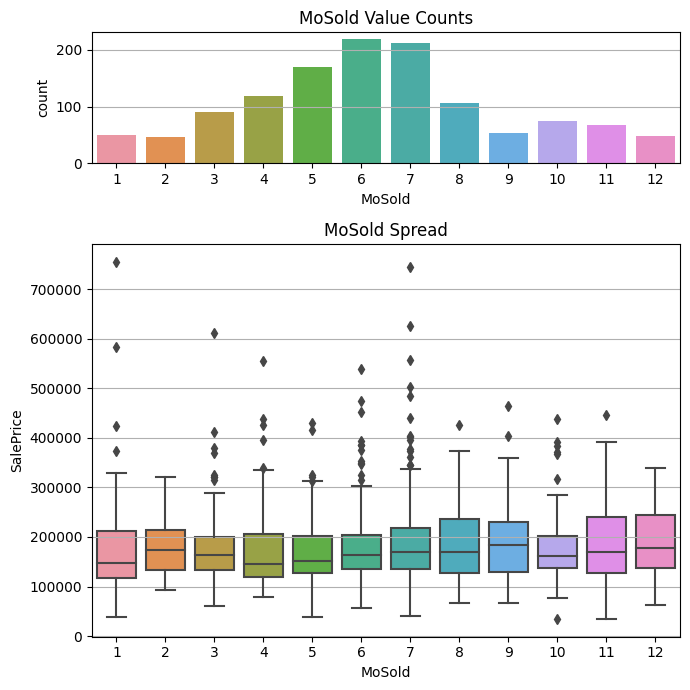

In [1375]:
count_box_plots('MoSold')

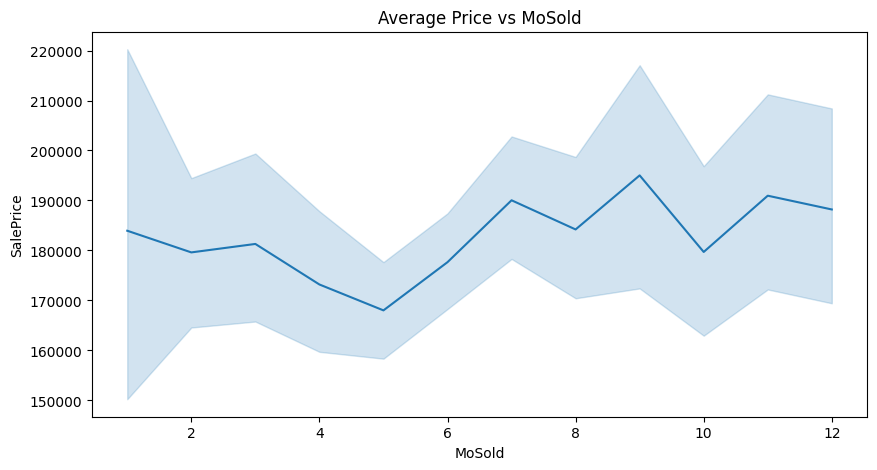

In [1376]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Average Price vs MoSold')
sns.lineplot(data=train, x="MoSold", y="SalePrice")
plt.show()

#### YrSold

Year Sold

In [1377]:
train['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

In [1378]:
train['YrSold'].value_counts()

2007    291
2009    289
2006    272
2008    260
2010    147
Name: YrSold, dtype: int64

In [1379]:
train['YrSold'].isna().sum()

0

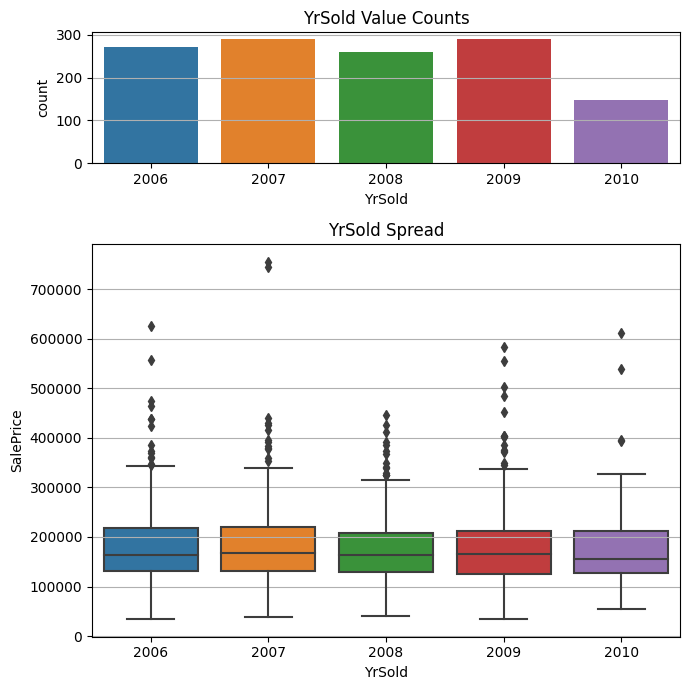

In [1380]:
count_box_plots('YrSold')

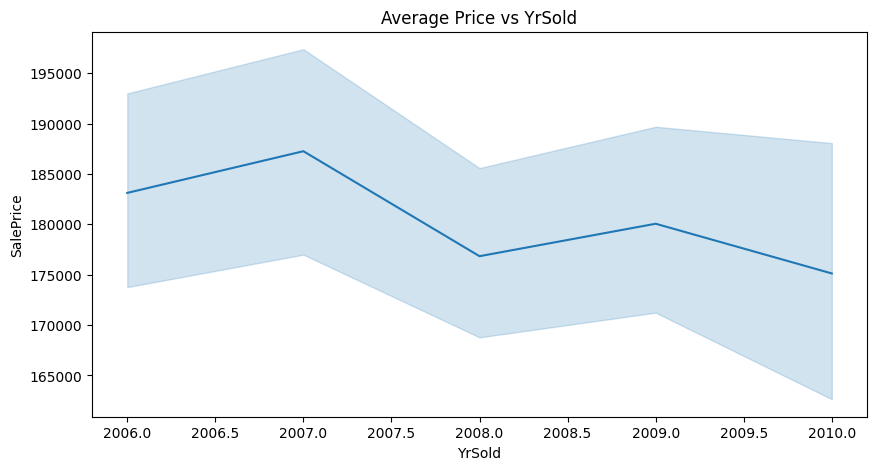

In [1381]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Average Price vs YrSold')
sns.lineplot(data=train, x="YrSold", y="SalePrice")
plt.show()

#### SaleType

Type of sale

In [1382]:
train['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [1383]:
train['SaleType'].value_counts()

WD       1087
New       107
COD        38
ConLD       9
ConLI       5
ConLw       5
Oth         3
CWD         3
Con         2
Name: SaleType, dtype: int64

In [1384]:
train['SaleType'].isna().sum()

0

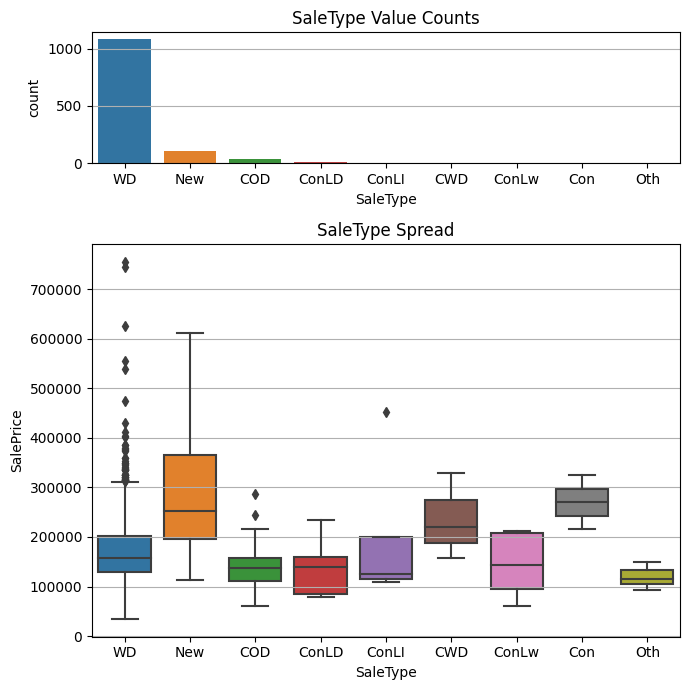

In [1385]:
count_box_plots('SaleType')

#### SaleCondition

Condition of sale

In [1386]:
train['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [1387]:
train['SaleCondition'].value_counts()

Normal     1024
Partial     110
Abnorml      92
Family       18
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [1388]:
train['SaleCondition'].isna().sum()

0

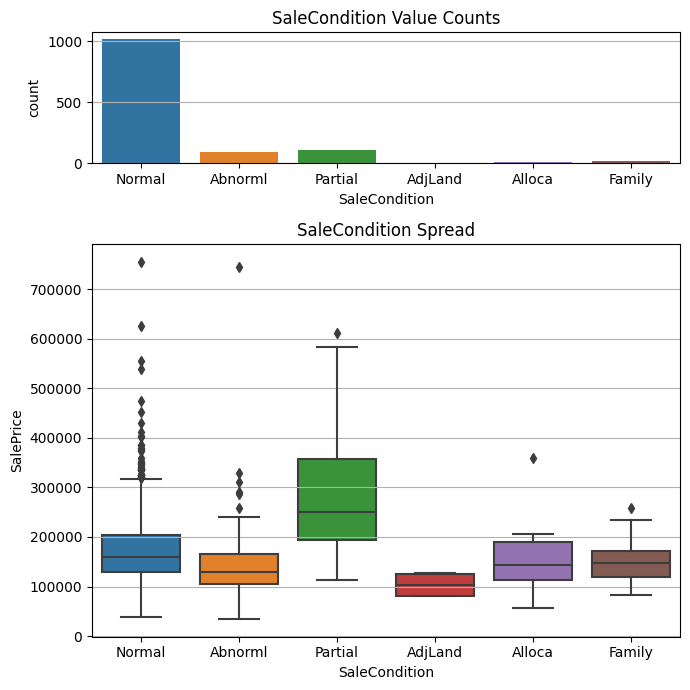

In [1389]:
count_box_plots('SaleCondition')

In [1390]:
missing1 = pd.concat([train.isnull().sum(), 100 * train.isnull().mean()], axis=1,)
missing1.columns=['count', '%']
missing1 = missing1.sort_values(by='count', ascending=False)
missing1.head(15)

count          %
LotFrontage     218  17.315330
GarageType       71   5.639396
GarageYrBlt      71   5.639396
GarageFinish     71   5.639396
GarageQual       71   5.639396
GarageCond       71   5.639396
BsmtExposure     36   2.859412
BsmtFinType2     36   2.859412
BsmtQual         35   2.779984
BsmtCond         35   2.779984
BsmtFinType1     35   2.779984
MasVnrType        7   0.555997
MasVnrArea        7   0.555997
BedroomAbvGr      0   0.000000
HalfBath          0   0.000000

In [1391]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'SalePrice', data=train, alpha=0.5)
        ax.set(xlabel=col, ylabel='Sale Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [1396]:
numerical_features = train.select_dtypes(include=[np.number])
#numerical_features.dtypes

In [1395]:
#scatterplots(numerical_features, ncol=5, figsize=(15,15))

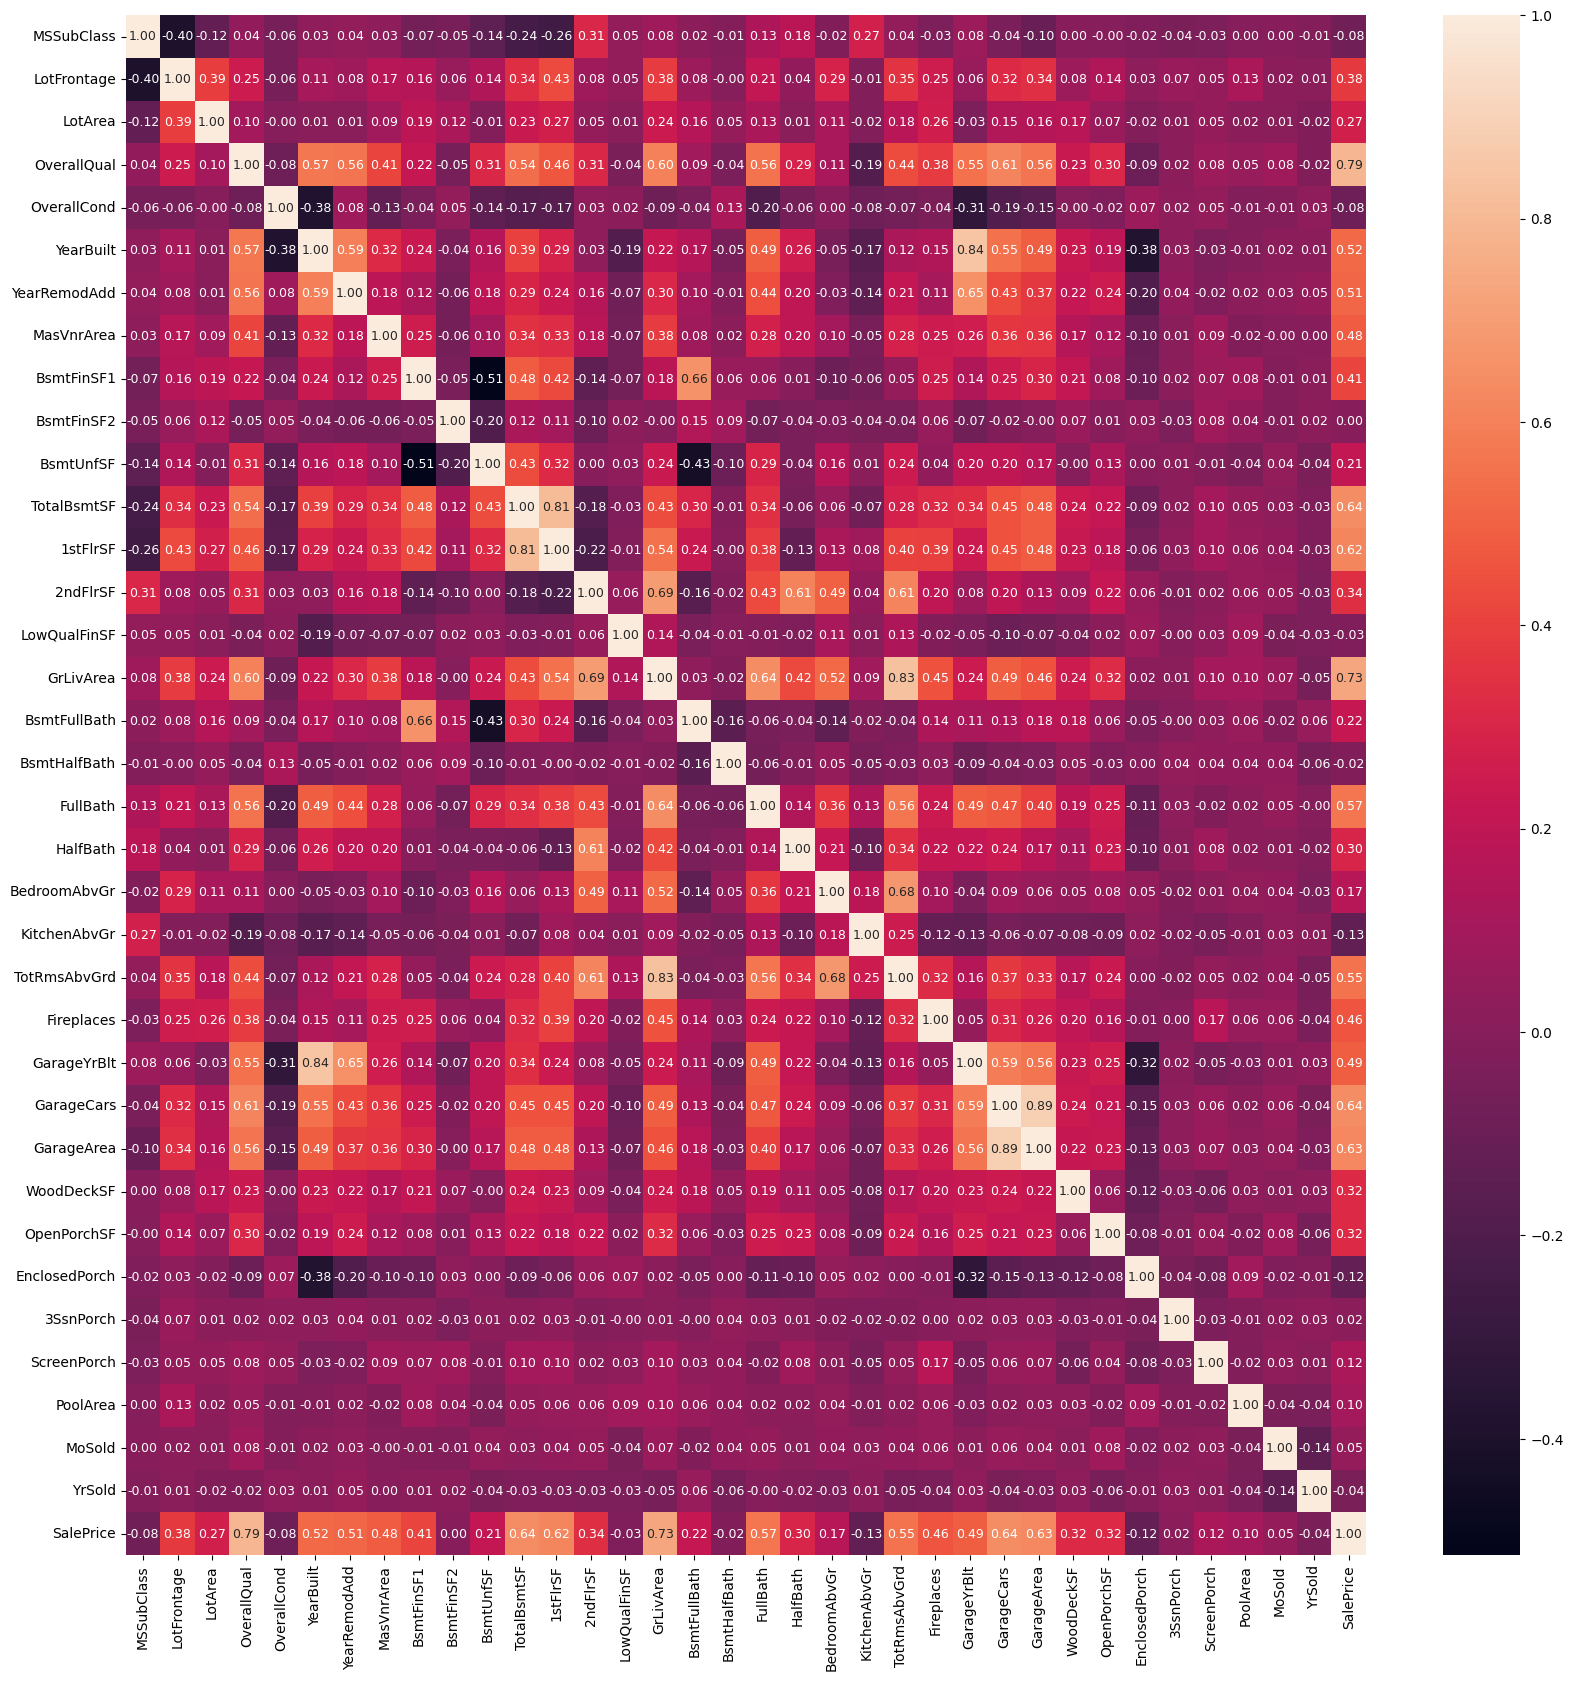

In [1394]:
plt.subplots(figsize=(20,20))
corr = train.corr(method='pearson')
ax = sns.heatmap(corr, annot=True,annot_kws={'size':9}, fmt=".2f")

In [1397]:
# save data to a new .csv file
datapath = '../data'
save_file(train, 'house_prices.csv', datapath)

Writing file.  "../data/house_prices.csv"
